# Overall Summary of Boston Housing project

Enter           enter edit mode                 Shift-­Enter     run cell, select below
Ctrl-Enter      run cell                        Alt-Enter       run cell, insert below
Y               to code                         M               to markdown
R               to raw                          1               to heading 1
2,3,4,5,6       to heading 2,3,4,5,6            Up/K            select cell above
Down/J          select cell below               A/B             insert cell above/­below
X               cut selected cell               C               copy selected cell
Shift-V         paste cell above                V               paste cell below
Z               undo last cell deletion         D,D             delete selected cell
Shift-M         merge cell below                Ctrl-S          Save and Checkpoint
L               toggle line numbers             O               toggle output
Shift-O         toggle output scrolling         Esc             close pager
H               show keyboard shortcut help     I,I             interrupt kernel
0,0             restart kernel                  Space           scroll down
Shift-­Space     scroll up                       Shift           ignore

Edit Mode (press Enter to enable)
Tab                 code completion or indent   Shift-Tab           tooltip
Ctrl-]              indent                      Ctrl-[              dedent
Ctrl-A              select all                  Ctrl-Z              undo
Ctrl-S­hift-Z        redo                        Ctrl-Y              redo
Ctrl-Home           go to cell start            Ctrl-Up             go to cell start
Ctrl-End            go to cell end              Ctrl-Down           go to cell end
Ctrl-Left           go one word left            Ctrl-Right          go one word right
Ctrl-B­ack­space      delete word before          Ctrl-D­elete         delete word after
Esc                 command mode                Ctrl-M              command mode
Shift-­Enter         run cell, select below      Ctrl-Enter          run cell
Alt-Enter           run cell, insert below      Ctrl-S­hif­t-S­ubtract split cell
Ctrl-S­hift--        split cell                  Ctrl-S              Save and Checkpoint
Ctrl-/              toggle comment on current or selected lines

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import csv
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import ShuffleSplit
from sklearn import svm
from sklearn import linear_model
from sklearn import datasets
from sklearn.cross_validation import train_test_split
from pandas.tools.plotting import scatter_matrix
from sklearn import preprocessing
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

path = '/home/collin/machine_learning/CS6140ML18Fall-smith.colin/midterm/data/'
data_file = 'boston-home-data-only.txt' 
output_file = 'boston_home_data.csv'

/home/collin/anaconda3/lib/python3.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/collin/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
data = pd.read_csv(path+data_file, delim_whitespace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(12), int64(2)
memory usage: 55.4 KB


In [6]:
data.describe()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
nox_y = data['NOX']
medv_y = data['MEDV']

## Now that Y's are set 

## I set up a standardized version and a series of normalizers, l1, l2, and max.



In [8]:
scaler = StandardScaler()
cols = data.columns.tolist()
datax = pd.DataFrame(scaler.fit_transform(data))
datax.columns = cols

In [9]:
medv_x = data.drop(columns=['MEDV'])
nox_x = data.drop(columns=['NOX'])
medv2_x = data.drop(columns=['MEDV', 'DIS', 'CHAS', 'B'])
nox2_x = data.drop(columns=['NOX', 'CHAS', 'PTRATIO'])

l2_medv_x = pd.DataFrame(normalize(medv_x))
l2_medv2_x = pd.DataFrame(normalize(medv2_x))

l1_medv_x = pd.DataFrame(normalize(medv_x, norm='l1'))
l1_medv2_x = pd.DataFrame(normalize(medv2_x, norm='l1'))

max_medv_x = pd.DataFrame(normalize(medv_x, norm='max'))
max_medv2_x = pd.DataFrame(normalize(medv2_x, norm='max'))

l2_nox_x = pd.DataFrame(normalize(nox_x))
l2_nox2_x = pd.DataFrame(normalize(nox2_x))

l1_nox_x = pd.DataFrame(normalize(nox_x, norm='l1'))
l1_nox2_x = pd.DataFrame(normalize(nox2_x, norm='l1'))

max_nox_x = pd.DataFrame(normalize(nox_x, norm='max'))
max_nox2_x = pd.DataFrame(normalize(nox2_x, norm='max'))

In [10]:
medv_t_sets = []
nox_t_sets = []
mvn_l = []
nn_l =[]

DESC = 0
X_TRAIN = 1
Y_TRAIN = 2
X_TEST = 3
Y_TEST = 4

In [11]:
def append_tts(x_train, x_test, y_train, y_test, descr, t_sets):
    
    li=[]
    li.append(descr)
    li.append(x_train)
    li.append(y_train)
    li.append(x_test)
    li.append(y_test)
    t_sets.append(li)

    return (len(t_sets)-1)

a,b,c,d = train_test_split(medv_x, medv_y, test_size=.2, random_state=17)
MEDV = append_tts(a,b,c,d, 'medv:  ', medv_t_sets)

q,w,e,r = train_test_split(nox_x, nox_y, test_size=.2, random_state=17)
NOX = append_tts(q,w,e,r, 'nox:   ', nox_t_sets)

mvn_l.append(MEDV)
nn_l.append(NOX)

In [12]:
a,b,c,d = train_test_split(medv2_x, medv_y, test_size=.2, random_state=17)
MEDV2 = append_tts(a,b,c,d, 'medv2:  ', medv_t_sets)

q,w,e,r = train_test_split(nox2_x, nox_y, test_size=.2, random_state=17)
NOX2 = append_tts(q,w,e,r, 'nox2:   ', nox_t_sets)

mvn_l.append(MEDV2)
nn_l.append(NOX2)

In [13]:
a,b,c,d = train_test_split(l2_medv_x, medv_y, test_size=.2, random_state=17)
L2MV = append_tts(a,b,c,d, 'l2_medv:  ', medv_t_sets)

q,w,e,r = train_test_split(l2_nox_x, nox_y, test_size=.2, random_state=17)
L2NOX = append_tts(q,w,e,r, 'l2_nox:   ', nox_t_sets)

mvn_l.append(MEDV2)
nn_l.append(NOX2)

In [14]:
a,b,c,d = train_test_split(l2_medv2_x, medv_y, test_size=.2, random_state=17)
L2MV2 = append_tts(a,b,c,d, 'l2_medv2:  ', medv_t_sets)

q,w,e,r = train_test_split(l2_nox2_x, nox_y, test_size=.2, random_state=17)
L2NOX2 = append_tts(q,w,e,r, 'l2_nox2:   ', nox_t_sets)

In [15]:
a,b,c,d = train_test_split(l1_medv_x, medv_y, test_size=.2, random_state=17)
L1MV = append_tts(a,b,c,d, 'l1_medv:  ', medv_t_sets)

q,w,e,r = train_test_split(l1_nox_x, nox_y, test_size=.2, random_state=17)
L1NOX = append_tts(q,w,e,r, 'l1_nox:   ', nox_t_sets)

In [16]:
a,b,c,d = train_test_split(l1_medv2_x, medv_y, test_size=.2, random_state=17)
L1MV2 = append_tts(a,b,c,d, 'l1_medv2:  ', medv_t_sets)

q,w,e,r = train_test_split(l1_nox2_x, nox_y, test_size=.2, random_state=17)
L1NOX2 = append_tts(q,w,e,r, 'l1_nox2:   ', nox_t_sets)

In [17]:
a,b,c,d = train_test_split(max_medv_x, medv_y, test_size=.2, random_state=17)
MAXMV = append_tts(a,b,c,d, 'max_medv:  ', medv_t_sets)

q,w,e,r = train_test_split(max_nox_x, nox_y, test_size=.2, random_state=17)
MAXNOX = append_tts(q,w,e,r, 'max_nox:   ', nox_t_sets)

In [18]:
a,b,c,d = train_test_split(max_medv2_x, medv_y, test_size=.2, random_state=17)
MAXMV2 = append_tts(a,b,c,d, 'max_medv2:  ', medv_t_sets)

q,w,e,r = train_test_split(max_nox2_x, nox_y, test_size=.2, random_state=17)
MAXNOX2 = append_tts(q,w,e,r, 'max_nox2:   ', nox_t_sets)

## This is a clean dataset. There is very little cross correlation. Seems like there is very little correlation actually. For this dataset I will keep the full dataset and use a second dataset where I will try to drop out some noise from medv and nox.

## Going to start with Median Value first.

## So Baseline.

#### In response to the request to change the baseline I have added some additional functionality. For a bucketed label set finding the +/- values of the largest total of the cell  plus 4 or 6 around the center cell on each side will be a commonly used tactic.  

So get_plusmin_23

In [41]:
def get_plusmin_23(list):
    pm_2 = 0
    pm_3 = 0
    for i in range(len(hist_y)):
        temp2 = 0
        temp3 = 0
        if(len(hist_y) < 6):
            print ('The list is short. You can figure this out yourself.')
            return 0, 0;
        if i < 2:
            temp2 = sum(hist_y[0:4])
        elif i < 3:
            temp2 = sum(hist_y[i-2:i+2])
            temp3 = sum(hist_y[0:6])
        else:
            temp2 = sum(hist_y[i-2:i+3])
            temp3 = sum(hist_y[i-3:i+4])
        if temp2 > pm_2:
            pm_2 = temp2
        if temp3 > pm_3:
            pm_3 = temp3
    return pm_2, pm_3

In [42]:
hist_y = []
pm_2 = 0
pm_3 = 0

for i in range (52):
    hist_y.append(0)
for i in range (len(medv_y)):
    hist_y[int(medv_y[i])] += 1



pm_2, pm_3 = get_plusmin_23(hist_y)
print(pm_2)
print(pm_2/len(medv_y))
print(pm_3)
print(pm_3/len(medv_y))

176
0.34782608695652173
226
0.44664031620553357


## +/-2 gets us 34.7% 

## +/-3 gets us 44.6%

## Lets start with linear and logistic regressions.

In [43]:
lin = linear_model.LinearRegression()
log = linear_model.LogisticRegression()

In [44]:
medv1_x_train, medv1_x_test, medv1_y_train, medv1_y_test = train_test_split(medv_x, medv_y, test_size=0.2, random_state=4)
medv2_x_train, medv2_x_test, medv2_y_train, medv2_y_test = train_test_split(medv2_x, medv_y, test_size=0.2, random_state=4)

medv1_nx_train, medv1_nx_test, medv1_ny_train, medv1_ny_test = train_test_split(l2_medv_x, medv_y, test_size=0.2, random_state=4)
medv2_nx_train, medv2_nx_test, medv2_ny_train, medv2_ny_test = train_test_split(l2_medv2_x, medv_y, test_size=0.2, random_state=4)


In [45]:
lin_medv1_pred = lin.fit(medv1_x_train, medv1_y_train).predict(medv1_x_test)
lin_medv2_pred = lin.fit(medv2_x_train, medv2_y_train).predict(medv2_x_test)


## Basic linear regression to predict median value.

### Plotting the results below the complete dataset did better setting up the model. There were a few outliers at the far end and there was a general tendancy to guess low at the high end of the values. 

### There is a bit better than smartest dumb solution correlation.

#### The below graphs indicate a measure of the erros in our regression. The range is the +/- amount from the predicted value to determine a "correct" result. Correct is the number of times the true value was range distance from the predicted value. 

#### Mean Variance is the Mean Absolute Error. 

#### The graphs plot the true result on the X axis and the natural value of the error on the y axis. This is probably the best means to assess your predictive model visually. 

#### If your regressor found something very predictive it will do something other than slope down to the right. Almost every one of these slopes down to the right.  

#### get_confidence_interval(percentage) gives you the value +/- you have to allow to get the percentage passed to the function. In the regression immediately below if you allow 3.05 +/- you can claim 60% accuracy on your prediction. 44.6% is baseline. Some improvement.

In [46]:
from result_lib import Result

res_medv1_lin = Result(lin_medv1_pred, medv1_y_test.values, 1)
res_medv2_lin = Result(lin_medv2_pred, medv2_y_test.values, 1)

Range: 1
Correct: 22
Mean Variance: 3.367790983796587


3.0504732184884134

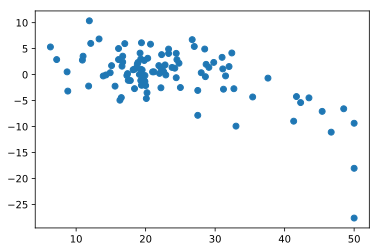

In [47]:
res_medv1_lin.display_totals()
plt.plot(medv1_y_test, res_medv1_lin.list_variances, 'o')
res_medv1_lin.get_confidence_interval(60)

Range: 1
Correct: 26
Mean Variance: 3.470227459420825


3.033927400961545

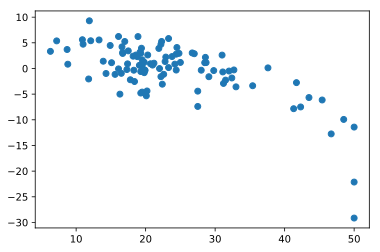

In [48]:
res_medv2_lin.display_totals()
plt.plot(medv2_y_test, res_medv2_lin.list_variances, 'o')
res_medv2_lin.get_confidence_interval(57)


## Basic Logisitic Regression to predict median value.

### I am getting a an unknown label 'continuous' error here. Still trying to figure it out.

#### After a fair amount of reading discussions on this topic it seems "discretizing" a label is considered a bad practice because you are "losing data."

#### Just my 2 cents. If it has predictive value it has value and is doesn't matter if you are losing data. But the tools for this are still in development and I would have to write a program to do this. 

#### I will. I just don't have  time right now I have 2.5 hours before 5.

In [49]:
# log_medv1_pred = log.fit(medv1_nx_train, medv1_ny_train).predict(medv1_nx_test)
# log_medv2_pred = log.fit(medv2_nx_train, medv2_ny_train).predict(medv2_nx_test)

In [50]:
# res_medv1_log = Result(log_medv1_pred, medv_y_test.values, 1)
# res_medv2_log = Result(log_medv2_pred, medv_y_test.values, 1)

In [51]:
# len(medv_t_sets)

In [52]:
# svm_temp = svm.SVC(kernel='poly', C=2)
# y_pred = svm_temp.fit(medv_t_sets[4][X_TRAIN], medv_t_sets[4][Y_TRAIN]).predict(medv_t_sets[4][X_TEST])

medv1_x_train, medv1_x_test, medv1_y_train, medv1_y_test = train_test_split(medv_x, medv_y, test_size=0.2, random_state=4)
medv2_x_train, medv2_x_test, medv2_y_train, medv2_y_test = train_test_split(medv2_x, medv_y, test_size=0.2, random_state=4)


In [53]:
# kernals = ['linear', 'rbf', 'sigmoid']

# for krnl in kernals:
#     for power in range(-3, 10):
#         for i in range(2):
#             svm_temp = svm.SVC(kernel=krnl, C=2**power).fit(x_trains[i], y_trains[i])
#             y_pred=svm_temp.predict(x_test)
#             res_temp = Result(y_pred, y_test.values, 1)
#             print('Kernal: ' + krnl + '  C: 2**' + str(power) + 'dataset #: ' + str(i + 1))
#             res_temp.display_totals()

## Gradiant Boosting To Predict Median Value

### I just started working with these. They generally outperom the other models I have used so far. 

In [54]:
grb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0, loss='ls')
y_pred = grb.fit(medv_t_sets[MEDV][X_TRAIN], medv_t_sets[MEDV][Y_TRAIN]).predict(medv_t_sets[MEDV][X_TEST])
grb_medv_res = Result(y_pred, medv_t_sets[MEDV][Y_TEST].values, 0.11)
grb_medv_res.display_totals()

Range: 0.11
Correct: 3
Mean Variance: 2.5862241699745723


3.106994684653479

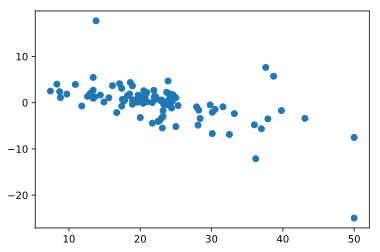

In [55]:
plt.plot(medv_t_sets[MEDV][Y_TEST].values, grb_medv_res.list_variances, 'o')
grb_medv_res.get_confidence_interval(70)

### The GradientBoostingRegressor was actually a significant improvment.

### Now to try the same model on the other datasets.

In [56]:
grb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0, loss='ls')

for l in medv_t_sets:
    y_pred = grb.fit(l[X_TRAIN], l[Y_TRAIN]).predict(l[X_TEST])
    grb_medv_res = Result(y_pred, l[Y_TEST].values, 0.11)
    print(l[DESC])
    grb_medv_res.display_totals()

medv:  
Range: 0.11
Correct: 3
Mean Variance: 2.5862241699745723
medv2:  
Range: 0.11
Correct: 3
Mean Variance: 2.4703184996379486
l2_medv:  
Range: 0.11
Correct: 4
Mean Variance: 2.8406791758015397
l2_medv2:  
Range: 0.11
Correct: 4
Mean Variance: 3.0372248356069127
l1_medv:  
Range: 0.11
Correct: 5
Mean Variance: 2.784726688167782
l1_medv2:  
Range: 0.11
Correct: 2
Mean Variance: 3.013084984566794
max_medv:  
Range: 0.11
Correct: 3
Mean Variance: 2.972423554797199
max_medv2:  
Range: 0.11
Correct: 3
Mean Variance: 3.083084403000549


### The second dataset medv2 where we dropped several of the columns considered noise did very well here. I am going to run this through some variations of the GBR.

### The ideal method would be to run all of these combinations on all of the datasets. 

For now I am going to settle for running these combinations on medv2.

I run each of these seperately.

max depth 1-10
learning_rate .1 - 1.0
n_estimators 100-1000

#### first depth

In [57]:

for i in range(1,11):
    grb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=i, random_state=0, loss='ls')

    y_pred = grb.fit(medv_t_sets[MEDV2][X_TRAIN], medv_t_sets[MEDV2][Y_TRAIN]).predict(medv_t_sets[MEDV2][X_TEST])
    grb_medv_res = Result(y_pred, medv_t_sets[MEDV2][Y_TEST].values, 0.11)
    print('DS: MEDV2, MaxDepth: ' + str(i))
    grb_medv_res.display_totals()

DS: MEDV2, MaxDepth: 1
Range: 0.11
Correct: 3
Mean Variance: 2.4703184996379486
DS: MEDV2, MaxDepth: 2
Range: 0.11
Correct: 6
Mean Variance: 2.1715648894171635
DS: MEDV2, MaxDepth: 3
Range: 0.11
Correct: 4
Mean Variance: 2.0814836731602626
DS: MEDV2, MaxDepth: 4
Range: 0.11
Correct: 6
Mean Variance: 2.0186589406057425
DS: MEDV2, MaxDepth: 5
Range: 0.11
Correct: 4
Mean Variance: 1.9458431844882178
DS: MEDV2, MaxDepth: 6
Range: 0.11
Correct: 5
Mean Variance: 2.3204775652552914
DS: MEDV2, MaxDepth: 7
Range: 0.11
Correct: 2
Mean Variance: 2.2544545301450927
DS: MEDV2, MaxDepth: 8
Range: 0.11
Correct: 5
Mean Variance: 2.4388529302435082
DS: MEDV2, MaxDepth: 9
Range: 0.11
Correct: 4
Mean Variance: 2.7201787786889353
DS: MEDV2, MaxDepth: 10
Range: 0.11
Correct: 4
Mean Variance: 2.8809672341476236


#### next learning rate

In [58]:
for i in range(1,11):
    grb = GradientBoostingRegressor(n_estimators=10*i, learning_rate=0.1, max_depth=5, random_state=0, loss='ls')

    y_pred = grb.fit(medv_t_sets[MEDV2][X_TRAIN], medv_t_sets[MEDV2][Y_TRAIN]).predict(medv_t_sets[MEDV2][X_TEST])
    grb_medv_res = Result(y_pred, medv_t_sets[MEDV2][Y_TEST].values, 0.11)
    print('DS: MEDV2, estimators: ' + str(i*10))
    grb_medv_res.display_totals()

DS: MEDV2, estimators: 10
Range: 0.11
Correct: 2
Mean Variance: 3.118859965032966
DS: MEDV2, estimators: 20
Range: 0.11
Correct: 1
Mean Variance: 2.3380594245824597
DS: MEDV2, estimators: 30
Range: 0.11
Correct: 3
Mean Variance: 2.120410966280896
DS: MEDV2, estimators: 40
Range: 0.11
Correct: 4
Mean Variance: 2.0295217046495724
DS: MEDV2, estimators: 50
Range: 0.11
Correct: 1
Mean Variance: 1.988393789593346
DS: MEDV2, estimators: 60
Range: 0.11
Correct: 1
Mean Variance: 1.9869318409604755
DS: MEDV2, estimators: 70
Range: 0.11
Correct: 2
Mean Variance: 1.9747263305144305
DS: MEDV2, estimators: 80
Range: 0.11
Correct: 2
Mean Variance: 1.9638305382047319
DS: MEDV2, estimators: 90
Range: 0.11
Correct: 2
Mean Variance: 1.9542832881881018
DS: MEDV2, estimators: 100
Range: 0.11
Correct: 4
Mean Variance: 1.9458431844882178


#### finally n_estimators

In [59]:
for i in range(1, 10):
    grb = GradientBoostingRegressor(n_estimators=100, learning_rate=i/100, max_depth=5, random_state=0, loss='ls')

    y_pred = grb.fit(medv_t_sets[MEDV2][X_TRAIN], medv_t_sets[MEDV2][Y_TRAIN]).predict(medv_t_sets[MEDV2][X_TEST])
    grb_medv_res = Result(y_pred, medv_t_sets[MEDV2][Y_TEST].values, 0.11)
    print('DS: MEDV2, learning_rate: ' + str(i/100))
    grb_medv_res.display_totals()

DS: MEDV2, learning_rate: 0.01
Range: 0.11
Correct: 5
Mean Variance: 3.1419311801421554
DS: MEDV2, learning_rate: 0.02
Range: 0.11
Correct: 4
Mean Variance: 2.299188915920759
DS: MEDV2, learning_rate: 0.03
Range: 0.11
Correct: 4
Mean Variance: 2.1359028404299534
DS: MEDV2, learning_rate: 0.04
Range: 0.11
Correct: 5
Mean Variance: 1.9780489968578405
DS: MEDV2, learning_rate: 0.05
Range: 0.11
Correct: 5
Mean Variance: 1.9411683823899313
DS: MEDV2, learning_rate: 0.06
Range: 0.11
Correct: 2
Mean Variance: 1.993613045853722
DS: MEDV2, learning_rate: 0.07
Range: 0.11
Correct: 3
Mean Variance: 1.9475648009818194
DS: MEDV2, learning_rate: 0.08
Range: 0.11
Correct: 3
Mean Variance: 1.93201982842
DS: MEDV2, learning_rate: 0.09
Range: 0.11
Correct: 5
Mean Variance: 1.9271150557838124


#### Now all including alpha



In [60]:
for ests in range(1,11):
    for lr in range(1, 10):
        for dep in range(1,10):
            for alp in range(1, 10):
                grb = GradientBoostingRegressor(alpha=alp/10, n_estimators=10*ests, learning_rate=lr/100, max_depth=dep, random_state=0, loss='ls')
                y_pred = grb.fit(medv_t_sets[MEDV2][X_TRAIN], medv_t_sets[MEDV2][Y_TRAIN]).predict(medv_t_sets[MEDV2][X_TEST])
                res = Result(y_pred, medv_t_sets[MEDV2][Y_TEST].values, 0.11)
                print('DS: MEDV2, alpha: ' + str(alp/10) + ' estimators: ' + str(ests*10) + ' Learn Rate: ' + str(lr/100) + ' Max Depth: ' + str(dep))
                print('MAE:   '+ str(res.mean_variance))

DS: MEDV2, alpha: 0.1 estimators: 10 Learn Rate: 0.01 Max Depth: 1
MAE:   5.530381274676067
DS: MEDV2, alpha: 0.2 estimators: 10 Learn Rate: 0.01 Max Depth: 1
MAE:   5.530381274676067
DS: MEDV2, alpha: 0.3 estimators: 10 Learn Rate: 0.01 Max Depth: 1
MAE:   5.530381274676067
DS: MEDV2, alpha: 0.4 estimators: 10 Learn Rate: 0.01 Max Depth: 1
MAE:   5.530381274676067
DS: MEDV2, alpha: 0.5 estimators: 10 Learn Rate: 0.01 Max Depth: 1
MAE:   5.530381274676067
DS: MEDV2, alpha: 0.6 estimators: 10 Learn Rate: 0.01 Max Depth: 1
MAE:   5.530381274676067
DS: MEDV2, alpha: 0.7 estimators: 10 Learn Rate: 0.01 Max Depth: 1
MAE:   5.530381274676067
DS: MEDV2, alpha: 0.8 estimators: 10 Learn Rate: 0.01 Max Depth: 1
MAE:   5.530381274676067
DS: MEDV2, alpha: 0.9 estimators: 10 Learn Rate: 0.01 Max Depth: 1
MAE:   5.530381274676067
DS: MEDV2, alpha: 0.1 estimators: 10 Learn Rate: 0.01 Max Depth: 2
MAE:   5.44058866914214
DS: MEDV2, alpha: 0.2 estimators: 10 Learn Rate: 0.01 Max Depth: 2
MAE:   5.44058

DS: MEDV2, alpha: 0.8 estimators: 10 Learn Rate: 0.02 Max Depth: 2
MAE:   5.139311855610467
DS: MEDV2, alpha: 0.9 estimators: 10 Learn Rate: 0.02 Max Depth: 2
MAE:   5.139311855610467
DS: MEDV2, alpha: 0.1 estimators: 10 Learn Rate: 0.02 Max Depth: 3
MAE:   5.004748933338502
DS: MEDV2, alpha: 0.2 estimators: 10 Learn Rate: 0.02 Max Depth: 3
MAE:   5.004748933338502
DS: MEDV2, alpha: 0.3 estimators: 10 Learn Rate: 0.02 Max Depth: 3
MAE:   5.004748933338502
DS: MEDV2, alpha: 0.4 estimators: 10 Learn Rate: 0.02 Max Depth: 3
MAE:   5.004748933338502
DS: MEDV2, alpha: 0.5 estimators: 10 Learn Rate: 0.02 Max Depth: 3
MAE:   5.004748933338502
DS: MEDV2, alpha: 0.6 estimators: 10 Learn Rate: 0.02 Max Depth: 3
MAE:   5.004748933338502
DS: MEDV2, alpha: 0.7 estimators: 10 Learn Rate: 0.02 Max Depth: 3
MAE:   5.004748933338502
DS: MEDV2, alpha: 0.8 estimators: 10 Learn Rate: 0.02 Max Depth: 3
MAE:   5.004748933338502
DS: MEDV2, alpha: 0.9 estimators: 10 Learn Rate: 0.02 Max Depth: 3
MAE:   5.0047

DS: MEDV2, alpha: 0.9 estimators: 10 Learn Rate: 0.03 Max Depth: 3
MAE:   4.6931954704566365
DS: MEDV2, alpha: 0.1 estimators: 10 Learn Rate: 0.03 Max Depth: 4
MAE:   4.629725323525148
DS: MEDV2, alpha: 0.2 estimators: 10 Learn Rate: 0.03 Max Depth: 4
MAE:   4.629725323525148
DS: MEDV2, alpha: 0.3 estimators: 10 Learn Rate: 0.03 Max Depth: 4
MAE:   4.629725323525148
DS: MEDV2, alpha: 0.4 estimators: 10 Learn Rate: 0.03 Max Depth: 4
MAE:   4.629725323525148
DS: MEDV2, alpha: 0.5 estimators: 10 Learn Rate: 0.03 Max Depth: 4
MAE:   4.629725323525148
DS: MEDV2, alpha: 0.6 estimators: 10 Learn Rate: 0.03 Max Depth: 4
MAE:   4.629725323525148
DS: MEDV2, alpha: 0.7 estimators: 10 Learn Rate: 0.03 Max Depth: 4
MAE:   4.629725323525148
DS: MEDV2, alpha: 0.8 estimators: 10 Learn Rate: 0.03 Max Depth: 4
MAE:   4.629725323525148
DS: MEDV2, alpha: 0.9 estimators: 10 Learn Rate: 0.03 Max Depth: 4
MAE:   4.629725323525148
DS: MEDV2, alpha: 0.1 estimators: 10 Learn Rate: 0.03 Max Depth: 5
MAE:   4.638

DS: MEDV2, alpha: 0.1 estimators: 10 Learn Rate: 0.04 Max Depth: 5
MAE:   4.3580598422437085
DS: MEDV2, alpha: 0.2 estimators: 10 Learn Rate: 0.04 Max Depth: 5
MAE:   4.3580598422437085
DS: MEDV2, alpha: 0.3 estimators: 10 Learn Rate: 0.04 Max Depth: 5
MAE:   4.3580598422437085
DS: MEDV2, alpha: 0.4 estimators: 10 Learn Rate: 0.04 Max Depth: 5
MAE:   4.3580598422437085
DS: MEDV2, alpha: 0.5 estimators: 10 Learn Rate: 0.04 Max Depth: 5
MAE:   4.3580598422437085
DS: MEDV2, alpha: 0.6 estimators: 10 Learn Rate: 0.04 Max Depth: 5
MAE:   4.3580598422437085
DS: MEDV2, alpha: 0.7 estimators: 10 Learn Rate: 0.04 Max Depth: 5
MAE:   4.3580598422437085
DS: MEDV2, alpha: 0.8 estimators: 10 Learn Rate: 0.04 Max Depth: 5
MAE:   4.3580598422437085
DS: MEDV2, alpha: 0.9 estimators: 10 Learn Rate: 0.04 Max Depth: 5
MAE:   4.3580598422437085
DS: MEDV2, alpha: 0.1 estimators: 10 Learn Rate: 0.04 Max Depth: 6
MAE:   4.442498984282901
DS: MEDV2, alpha: 0.2 estimators: 10 Learn Rate: 0.04 Max Depth: 6
MAE:

DS: MEDV2, alpha: 0.6 estimators: 10 Learn Rate: 0.05 Max Depth: 6
MAE:   4.1863505161923875
DS: MEDV2, alpha: 0.7 estimators: 10 Learn Rate: 0.05 Max Depth: 6
MAE:   4.1863505161923875
DS: MEDV2, alpha: 0.8 estimators: 10 Learn Rate: 0.05 Max Depth: 6
MAE:   4.1863505161923875
DS: MEDV2, alpha: 0.9 estimators: 10 Learn Rate: 0.05 Max Depth: 6
MAE:   4.1863505161923875
DS: MEDV2, alpha: 0.1 estimators: 10 Learn Rate: 0.05 Max Depth: 7
MAE:   4.198512950271338
DS: MEDV2, alpha: 0.2 estimators: 10 Learn Rate: 0.05 Max Depth: 7
MAE:   4.198512950271338
DS: MEDV2, alpha: 0.3 estimators: 10 Learn Rate: 0.05 Max Depth: 7
MAE:   4.198512950271338
DS: MEDV2, alpha: 0.4 estimators: 10 Learn Rate: 0.05 Max Depth: 7
MAE:   4.198512950271338
DS: MEDV2, alpha: 0.5 estimators: 10 Learn Rate: 0.05 Max Depth: 7
MAE:   4.198512950271338
DS: MEDV2, alpha: 0.6 estimators: 10 Learn Rate: 0.05 Max Depth: 7
MAE:   4.198512950271338
DS: MEDV2, alpha: 0.7 estimators: 10 Learn Rate: 0.05 Max Depth: 7
MAE:   4.

DS: MEDV2, alpha: 0.6 estimators: 10 Learn Rate: 0.06 Max Depth: 7
MAE:   3.944746540661969
DS: MEDV2, alpha: 0.7 estimators: 10 Learn Rate: 0.06 Max Depth: 7
MAE:   3.944746540661969
DS: MEDV2, alpha: 0.8 estimators: 10 Learn Rate: 0.06 Max Depth: 7
MAE:   3.944746540661969
DS: MEDV2, alpha: 0.9 estimators: 10 Learn Rate: 0.06 Max Depth: 7
MAE:   3.944746540661969
DS: MEDV2, alpha: 0.1 estimators: 10 Learn Rate: 0.06 Max Depth: 8
MAE:   4.037011670464738
DS: MEDV2, alpha: 0.2 estimators: 10 Learn Rate: 0.06 Max Depth: 8
MAE:   4.037011670464738
DS: MEDV2, alpha: 0.3 estimators: 10 Learn Rate: 0.06 Max Depth: 8
MAE:   4.037011670464738
DS: MEDV2, alpha: 0.4 estimators: 10 Learn Rate: 0.06 Max Depth: 8
MAE:   4.037011670464738
DS: MEDV2, alpha: 0.5 estimators: 10 Learn Rate: 0.06 Max Depth: 8
MAE:   4.037011670464738
DS: MEDV2, alpha: 0.6 estimators: 10 Learn Rate: 0.06 Max Depth: 8
MAE:   4.037011670464738
DS: MEDV2, alpha: 0.7 estimators: 10 Learn Rate: 0.06 Max Depth: 8
MAE:   4.0370

DS: MEDV2, alpha: 0.6 estimators: 10 Learn Rate: 0.07 Max Depth: 8
MAE:   3.8144650268261975
DS: MEDV2, alpha: 0.7 estimators: 10 Learn Rate: 0.07 Max Depth: 8
MAE:   3.8144650268261975
DS: MEDV2, alpha: 0.8 estimators: 10 Learn Rate: 0.07 Max Depth: 8
MAE:   3.8144650268261975
DS: MEDV2, alpha: 0.9 estimators: 10 Learn Rate: 0.07 Max Depth: 8
MAE:   3.8144650268261975
DS: MEDV2, alpha: 0.1 estimators: 10 Learn Rate: 0.07 Max Depth: 9
MAE:   3.9000027307221847
DS: MEDV2, alpha: 0.2 estimators: 10 Learn Rate: 0.07 Max Depth: 9
MAE:   3.9000027307221847
DS: MEDV2, alpha: 0.3 estimators: 10 Learn Rate: 0.07 Max Depth: 9
MAE:   3.9000027307221847
DS: MEDV2, alpha: 0.4 estimators: 10 Learn Rate: 0.07 Max Depth: 9
MAE:   3.9000027307221847
DS: MEDV2, alpha: 0.5 estimators: 10 Learn Rate: 0.07 Max Depth: 9
MAE:   3.9000027307221847
DS: MEDV2, alpha: 0.6 estimators: 10 Learn Rate: 0.07 Max Depth: 9
MAE:   3.9000027307221847
DS: MEDV2, alpha: 0.7 estimators: 10 Learn Rate: 0.07 Max Depth: 9
MAE

DS: MEDV2, alpha: 0.7 estimators: 10 Learn Rate: 0.09 Max Depth: 1
MAE:   4.121666359423929
DS: MEDV2, alpha: 0.8 estimators: 10 Learn Rate: 0.09 Max Depth: 1
MAE:   4.121666359423929
DS: MEDV2, alpha: 0.9 estimators: 10 Learn Rate: 0.09 Max Depth: 1
MAE:   4.121666359423929
DS: MEDV2, alpha: 0.1 estimators: 10 Learn Rate: 0.09 Max Depth: 2
MAE:   3.774698918990586
DS: MEDV2, alpha: 0.2 estimators: 10 Learn Rate: 0.09 Max Depth: 2
MAE:   3.774698918990586
DS: MEDV2, alpha: 0.3 estimators: 10 Learn Rate: 0.09 Max Depth: 2
MAE:   3.774698918990586
DS: MEDV2, alpha: 0.4 estimators: 10 Learn Rate: 0.09 Max Depth: 2
MAE:   3.774698918990586
DS: MEDV2, alpha: 0.5 estimators: 10 Learn Rate: 0.09 Max Depth: 2
MAE:   3.774698918990586
DS: MEDV2, alpha: 0.6 estimators: 10 Learn Rate: 0.09 Max Depth: 2
MAE:   3.774698918990586
DS: MEDV2, alpha: 0.7 estimators: 10 Learn Rate: 0.09 Max Depth: 2
MAE:   3.774698918990586
DS: MEDV2, alpha: 0.8 estimators: 10 Learn Rate: 0.09 Max Depth: 2
MAE:   3.7746

DS: MEDV2, alpha: 0.6 estimators: 20 Learn Rate: 0.01 Max Depth: 2
MAE:   5.141413964917208
DS: MEDV2, alpha: 0.7 estimators: 20 Learn Rate: 0.01 Max Depth: 2
MAE:   5.141413964917208
DS: MEDV2, alpha: 0.8 estimators: 20 Learn Rate: 0.01 Max Depth: 2
MAE:   5.141413964917208
DS: MEDV2, alpha: 0.9 estimators: 20 Learn Rate: 0.01 Max Depth: 2
MAE:   5.141413964917208
DS: MEDV2, alpha: 0.1 estimators: 20 Learn Rate: 0.01 Max Depth: 3
MAE:   4.998088067001892
DS: MEDV2, alpha: 0.2 estimators: 20 Learn Rate: 0.01 Max Depth: 3
MAE:   4.998088067001892
DS: MEDV2, alpha: 0.3 estimators: 20 Learn Rate: 0.01 Max Depth: 3
MAE:   4.998088067001892
DS: MEDV2, alpha: 0.4 estimators: 20 Learn Rate: 0.01 Max Depth: 3
MAE:   4.998088067001892
DS: MEDV2, alpha: 0.5 estimators: 20 Learn Rate: 0.01 Max Depth: 3
MAE:   4.998088067001892
DS: MEDV2, alpha: 0.6 estimators: 20 Learn Rate: 0.01 Max Depth: 3
MAE:   4.998088067001892
DS: MEDV2, alpha: 0.7 estimators: 20 Learn Rate: 0.01 Max Depth: 3
MAE:   4.9980

DS: MEDV2, alpha: 0.7 estimators: 20 Learn Rate: 0.02 Max Depth: 4
MAE:   4.375886128778315
DS: MEDV2, alpha: 0.8 estimators: 20 Learn Rate: 0.02 Max Depth: 4
MAE:   4.375886128778315
DS: MEDV2, alpha: 0.9 estimators: 20 Learn Rate: 0.02 Max Depth: 4
MAE:   4.375886128778315
DS: MEDV2, alpha: 0.1 estimators: 20 Learn Rate: 0.02 Max Depth: 5
MAE:   4.3542433411899415
DS: MEDV2, alpha: 0.2 estimators: 20 Learn Rate: 0.02 Max Depth: 5
MAE:   4.3542433411899415
DS: MEDV2, alpha: 0.3 estimators: 20 Learn Rate: 0.02 Max Depth: 5
MAE:   4.3542433411899415
DS: MEDV2, alpha: 0.4 estimators: 20 Learn Rate: 0.02 Max Depth: 5
MAE:   4.3542433411899415
DS: MEDV2, alpha: 0.5 estimators: 20 Learn Rate: 0.02 Max Depth: 5
MAE:   4.3542433411899415
DS: MEDV2, alpha: 0.6 estimators: 20 Learn Rate: 0.02 Max Depth: 5
MAE:   4.3542433411899415
DS: MEDV2, alpha: 0.7 estimators: 20 Learn Rate: 0.02 Max Depth: 5
MAE:   4.3542433411899415
DS: MEDV2, alpha: 0.8 estimators: 20 Learn Rate: 0.02 Max Depth: 5
MAE:  

DS: MEDV2, alpha: 0.2 estimators: 20 Learn Rate: 0.03 Max Depth: 6
MAE:   3.9470554052768407
DS: MEDV2, alpha: 0.3 estimators: 20 Learn Rate: 0.03 Max Depth: 6
MAE:   3.9470554052768407
DS: MEDV2, alpha: 0.4 estimators: 20 Learn Rate: 0.03 Max Depth: 6
MAE:   3.9470554052768407
DS: MEDV2, alpha: 0.5 estimators: 20 Learn Rate: 0.03 Max Depth: 6
MAE:   3.9470554052768407
DS: MEDV2, alpha: 0.6 estimators: 20 Learn Rate: 0.03 Max Depth: 6
MAE:   3.9470554052768407
DS: MEDV2, alpha: 0.7 estimators: 20 Learn Rate: 0.03 Max Depth: 6
MAE:   3.9470554052768407
DS: MEDV2, alpha: 0.8 estimators: 20 Learn Rate: 0.03 Max Depth: 6
MAE:   3.9470554052768407
DS: MEDV2, alpha: 0.9 estimators: 20 Learn Rate: 0.03 Max Depth: 6
MAE:   3.9470554052768407
DS: MEDV2, alpha: 0.1 estimators: 20 Learn Rate: 0.03 Max Depth: 7
MAE:   3.976421198366728
DS: MEDV2, alpha: 0.2 estimators: 20 Learn Rate: 0.03 Max Depth: 7
MAE:   3.976421198366728
DS: MEDV2, alpha: 0.3 estimators: 20 Learn Rate: 0.03 Max Depth: 7
MAE: 

DS: MEDV2, alpha: 0.5 estimators: 20 Learn Rate: 0.04 Max Depth: 7
MAE:   3.596307210357809
DS: MEDV2, alpha: 0.6 estimators: 20 Learn Rate: 0.04 Max Depth: 7
MAE:   3.596307210357809
DS: MEDV2, alpha: 0.7 estimators: 20 Learn Rate: 0.04 Max Depth: 7
MAE:   3.596307210357809
DS: MEDV2, alpha: 0.8 estimators: 20 Learn Rate: 0.04 Max Depth: 7
MAE:   3.596307210357809
DS: MEDV2, alpha: 0.9 estimators: 20 Learn Rate: 0.04 Max Depth: 7
MAE:   3.596307210357809
DS: MEDV2, alpha: 0.1 estimators: 20 Learn Rate: 0.04 Max Depth: 8
MAE:   3.7006023955707077
DS: MEDV2, alpha: 0.2 estimators: 20 Learn Rate: 0.04 Max Depth: 8
MAE:   3.7006023955707077
DS: MEDV2, alpha: 0.3 estimators: 20 Learn Rate: 0.04 Max Depth: 8
MAE:   3.7006023955707077
DS: MEDV2, alpha: 0.4 estimators: 20 Learn Rate: 0.04 Max Depth: 8
MAE:   3.7006023955707077
DS: MEDV2, alpha: 0.5 estimators: 20 Learn Rate: 0.04 Max Depth: 8
MAE:   3.7006023955707077
DS: MEDV2, alpha: 0.6 estimators: 20 Learn Rate: 0.04 Max Depth: 8
MAE:   3

DS: MEDV2, alpha: 0.7 estimators: 20 Learn Rate: 0.05 Max Depth: 8
MAE:   3.365987238686111
DS: MEDV2, alpha: 0.8 estimators: 20 Learn Rate: 0.05 Max Depth: 8
MAE:   3.365987238686111
DS: MEDV2, alpha: 0.9 estimators: 20 Learn Rate: 0.05 Max Depth: 8
MAE:   3.365987238686111
DS: MEDV2, alpha: 0.1 estimators: 20 Learn Rate: 0.05 Max Depth: 9
MAE:   3.433791947060256
DS: MEDV2, alpha: 0.2 estimators: 20 Learn Rate: 0.05 Max Depth: 9
MAE:   3.433791947060256
DS: MEDV2, alpha: 0.3 estimators: 20 Learn Rate: 0.05 Max Depth: 9
MAE:   3.433791947060256
DS: MEDV2, alpha: 0.4 estimators: 20 Learn Rate: 0.05 Max Depth: 9
MAE:   3.433791947060256
DS: MEDV2, alpha: 0.5 estimators: 20 Learn Rate: 0.05 Max Depth: 9
MAE:   3.433791947060256
DS: MEDV2, alpha: 0.6 estimators: 20 Learn Rate: 0.05 Max Depth: 9
MAE:   3.433791947060256
DS: MEDV2, alpha: 0.7 estimators: 20 Learn Rate: 0.05 Max Depth: 9
MAE:   3.433791947060256
DS: MEDV2, alpha: 0.8 estimators: 20 Learn Rate: 0.05 Max Depth: 9
MAE:   3.4337

DS: MEDV2, alpha: 0.6 estimators: 20 Learn Rate: 0.06 Max Depth: 9
MAE:   3.344964008998594
DS: MEDV2, alpha: 0.7 estimators: 20 Learn Rate: 0.06 Max Depth: 9
MAE:   3.344964008998594
DS: MEDV2, alpha: 0.8 estimators: 20 Learn Rate: 0.06 Max Depth: 9
MAE:   3.344964008998594
DS: MEDV2, alpha: 0.9 estimators: 20 Learn Rate: 0.06 Max Depth: 9
MAE:   3.344964008998594
DS: MEDV2, alpha: 0.1 estimators: 20 Learn Rate: 0.07 Max Depth: 1
MAE:   3.705046500595588
DS: MEDV2, alpha: 0.2 estimators: 20 Learn Rate: 0.07 Max Depth: 1
MAE:   3.705046500595588
DS: MEDV2, alpha: 0.3 estimators: 20 Learn Rate: 0.07 Max Depth: 1
MAE:   3.705046500595588
DS: MEDV2, alpha: 0.4 estimators: 20 Learn Rate: 0.07 Max Depth: 1
MAE:   3.705046500595588
DS: MEDV2, alpha: 0.5 estimators: 20 Learn Rate: 0.07 Max Depth: 1
MAE:   3.705046500595588
DS: MEDV2, alpha: 0.6 estimators: 20 Learn Rate: 0.07 Max Depth: 1
MAE:   3.705046500595588
DS: MEDV2, alpha: 0.7 estimators: 20 Learn Rate: 0.07 Max Depth: 1
MAE:   3.7050

DS: MEDV2, alpha: 0.1 estimators: 20 Learn Rate: 0.08 Max Depth: 4
MAE:   2.63259003602549
DS: MEDV2, alpha: 0.2 estimators: 20 Learn Rate: 0.08 Max Depth: 4
MAE:   2.63259003602549
DS: MEDV2, alpha: 0.3 estimators: 20 Learn Rate: 0.08 Max Depth: 4
MAE:   2.63259003602549
DS: MEDV2, alpha: 0.4 estimators: 20 Learn Rate: 0.08 Max Depth: 4
MAE:   2.63259003602549
DS: MEDV2, alpha: 0.5 estimators: 20 Learn Rate: 0.08 Max Depth: 4
MAE:   2.63259003602549
DS: MEDV2, alpha: 0.6 estimators: 20 Learn Rate: 0.08 Max Depth: 4
MAE:   2.63259003602549
DS: MEDV2, alpha: 0.7 estimators: 20 Learn Rate: 0.08 Max Depth: 4
MAE:   2.63259003602549
DS: MEDV2, alpha: 0.8 estimators: 20 Learn Rate: 0.08 Max Depth: 4
MAE:   2.63259003602549
DS: MEDV2, alpha: 0.9 estimators: 20 Learn Rate: 0.08 Max Depth: 4
MAE:   2.63259003602549
DS: MEDV2, alpha: 0.1 estimators: 20 Learn Rate: 0.08 Max Depth: 5
MAE:   2.498693690590427
DS: MEDV2, alpha: 0.2 estimators: 20 Learn Rate: 0.08 Max Depth: 5
MAE:   2.4986936905904

DS: MEDV2, alpha: 0.4 estimators: 20 Learn Rate: 0.09 Max Depth: 5
MAE:   2.3684626980070917
DS: MEDV2, alpha: 0.5 estimators: 20 Learn Rate: 0.09 Max Depth: 5
MAE:   2.3684626980070917
DS: MEDV2, alpha: 0.6 estimators: 20 Learn Rate: 0.09 Max Depth: 5
MAE:   2.3684626980070917
DS: MEDV2, alpha: 0.7 estimators: 20 Learn Rate: 0.09 Max Depth: 5
MAE:   2.3684626980070917
DS: MEDV2, alpha: 0.8 estimators: 20 Learn Rate: 0.09 Max Depth: 5
MAE:   2.3684626980070917
DS: MEDV2, alpha: 0.9 estimators: 20 Learn Rate: 0.09 Max Depth: 5
MAE:   2.3684626980070917
DS: MEDV2, alpha: 0.1 estimators: 20 Learn Rate: 0.09 Max Depth: 6
MAE:   2.5861471843818165
DS: MEDV2, alpha: 0.2 estimators: 20 Learn Rate: 0.09 Max Depth: 6
MAE:   2.5861471843818165
DS: MEDV2, alpha: 0.3 estimators: 20 Learn Rate: 0.09 Max Depth: 6
MAE:   2.5861471843818165
DS: MEDV2, alpha: 0.4 estimators: 20 Learn Rate: 0.09 Max Depth: 6
MAE:   2.5861471843818165
DS: MEDV2, alpha: 0.5 estimators: 20 Learn Rate: 0.09 Max Depth: 6
MAE

DS: MEDV2, alpha: 0.6 estimators: 30 Learn Rate: 0.01 Max Depth: 6
MAE:   4.686360239547511
DS: MEDV2, alpha: 0.7 estimators: 30 Learn Rate: 0.01 Max Depth: 6
MAE:   4.686360239547511
DS: MEDV2, alpha: 0.8 estimators: 30 Learn Rate: 0.01 Max Depth: 6
MAE:   4.686360239547511
DS: MEDV2, alpha: 0.9 estimators: 30 Learn Rate: 0.01 Max Depth: 6
MAE:   4.686360239547511
DS: MEDV2, alpha: 0.1 estimators: 30 Learn Rate: 0.01 Max Depth: 7
MAE:   4.742588202422134
DS: MEDV2, alpha: 0.2 estimators: 30 Learn Rate: 0.01 Max Depth: 7
MAE:   4.742588202422134
DS: MEDV2, alpha: 0.3 estimators: 30 Learn Rate: 0.01 Max Depth: 7
MAE:   4.742588202422134
DS: MEDV2, alpha: 0.4 estimators: 30 Learn Rate: 0.01 Max Depth: 7
MAE:   4.742588202422134
DS: MEDV2, alpha: 0.5 estimators: 30 Learn Rate: 0.01 Max Depth: 7
MAE:   4.742588202422134
DS: MEDV2, alpha: 0.6 estimators: 30 Learn Rate: 0.01 Max Depth: 7
MAE:   4.742588202422134
DS: MEDV2, alpha: 0.7 estimators: 30 Learn Rate: 0.01 Max Depth: 7
MAE:   4.7425

DS: MEDV2, alpha: 0.9 estimators: 30 Learn Rate: 0.02 Max Depth: 7
MAE:   4.019724035291971
DS: MEDV2, alpha: 0.1 estimators: 30 Learn Rate: 0.02 Max Depth: 8
MAE:   4.012857455761459
DS: MEDV2, alpha: 0.2 estimators: 30 Learn Rate: 0.02 Max Depth: 8
MAE:   4.012857455761459
DS: MEDV2, alpha: 0.3 estimators: 30 Learn Rate: 0.02 Max Depth: 8
MAE:   4.012857455761459
DS: MEDV2, alpha: 0.4 estimators: 30 Learn Rate: 0.02 Max Depth: 8
MAE:   4.012857455761459
DS: MEDV2, alpha: 0.5 estimators: 30 Learn Rate: 0.02 Max Depth: 8
MAE:   4.012857455761459
DS: MEDV2, alpha: 0.6 estimators: 30 Learn Rate: 0.02 Max Depth: 8
MAE:   4.012857455761459
DS: MEDV2, alpha: 0.7 estimators: 30 Learn Rate: 0.02 Max Depth: 8
MAE:   4.012857455761459
DS: MEDV2, alpha: 0.8 estimators: 30 Learn Rate: 0.02 Max Depth: 8
MAE:   4.012857455761459
DS: MEDV2, alpha: 0.9 estimators: 30 Learn Rate: 0.02 Max Depth: 8
MAE:   4.012857455761459
DS: MEDV2, alpha: 0.1 estimators: 30 Learn Rate: 0.02 Max Depth: 9
MAE:   4.0140

DS: MEDV2, alpha: 0.9 estimators: 30 Learn Rate: 0.03 Max Depth: 8
MAE:   3.5820608475492395
DS: MEDV2, alpha: 0.1 estimators: 30 Learn Rate: 0.03 Max Depth: 9
MAE:   3.5208697177961983
DS: MEDV2, alpha: 0.2 estimators: 30 Learn Rate: 0.03 Max Depth: 9
MAE:   3.5208697177961983
DS: MEDV2, alpha: 0.3 estimators: 30 Learn Rate: 0.03 Max Depth: 9
MAE:   3.5208697177961983
DS: MEDV2, alpha: 0.4 estimators: 30 Learn Rate: 0.03 Max Depth: 9
MAE:   3.5208697177961983
DS: MEDV2, alpha: 0.5 estimators: 30 Learn Rate: 0.03 Max Depth: 9
MAE:   3.5208697177961983
DS: MEDV2, alpha: 0.6 estimators: 30 Learn Rate: 0.03 Max Depth: 9
MAE:   3.5208697177961983
DS: MEDV2, alpha: 0.7 estimators: 30 Learn Rate: 0.03 Max Depth: 9
MAE:   3.5208697177961983
DS: MEDV2, alpha: 0.8 estimators: 30 Learn Rate: 0.03 Max Depth: 9
MAE:   3.5208697177961983
DS: MEDV2, alpha: 0.9 estimators: 30 Learn Rate: 0.03 Max Depth: 9
MAE:   3.5208697177961983
DS: MEDV2, alpha: 0.1 estimators: 30 Learn Rate: 0.04 Max Depth: 1
MAE

DS: MEDV2, alpha: 0.6 estimators: 30 Learn Rate: 0.05 Max Depth: 1
MAE:   3.6972376623717724
DS: MEDV2, alpha: 0.7 estimators: 30 Learn Rate: 0.05 Max Depth: 1
MAE:   3.6972376623717724
DS: MEDV2, alpha: 0.8 estimators: 30 Learn Rate: 0.05 Max Depth: 1
MAE:   3.6972376623717724
DS: MEDV2, alpha: 0.9 estimators: 30 Learn Rate: 0.05 Max Depth: 1
MAE:   3.6972376623717724
DS: MEDV2, alpha: 0.1 estimators: 30 Learn Rate: 0.05 Max Depth: 2
MAE:   3.137033359278834
DS: MEDV2, alpha: 0.2 estimators: 30 Learn Rate: 0.05 Max Depth: 2
MAE:   3.137033359278834
DS: MEDV2, alpha: 0.3 estimators: 30 Learn Rate: 0.05 Max Depth: 2
MAE:   3.137033359278834
DS: MEDV2, alpha: 0.4 estimators: 30 Learn Rate: 0.05 Max Depth: 2
MAE:   3.137033359278834
DS: MEDV2, alpha: 0.5 estimators: 30 Learn Rate: 0.05 Max Depth: 2
MAE:   3.137033359278834
DS: MEDV2, alpha: 0.6 estimators: 30 Learn Rate: 0.05 Max Depth: 2
MAE:   3.137033359278834
DS: MEDV2, alpha: 0.7 estimators: 30 Learn Rate: 0.05 Max Depth: 2
MAE:   3.

DS: MEDV2, alpha: 0.1 estimators: 30 Learn Rate: 0.06 Max Depth: 3
MAE:   2.6405020520254787
DS: MEDV2, alpha: 0.2 estimators: 30 Learn Rate: 0.06 Max Depth: 3
MAE:   2.6405020520254787
DS: MEDV2, alpha: 0.3 estimators: 30 Learn Rate: 0.06 Max Depth: 3
MAE:   2.6405020520254787
DS: MEDV2, alpha: 0.4 estimators: 30 Learn Rate: 0.06 Max Depth: 3
MAE:   2.6405020520254787
DS: MEDV2, alpha: 0.5 estimators: 30 Learn Rate: 0.06 Max Depth: 3
MAE:   2.6405020520254787
DS: MEDV2, alpha: 0.6 estimators: 30 Learn Rate: 0.06 Max Depth: 3
MAE:   2.6405020520254787
DS: MEDV2, alpha: 0.7 estimators: 30 Learn Rate: 0.06 Max Depth: 3
MAE:   2.6405020520254787
DS: MEDV2, alpha: 0.8 estimators: 30 Learn Rate: 0.06 Max Depth: 3
MAE:   2.6405020520254787
DS: MEDV2, alpha: 0.9 estimators: 30 Learn Rate: 0.06 Max Depth: 3
MAE:   2.6405020520254787
DS: MEDV2, alpha: 0.1 estimators: 30 Learn Rate: 0.06 Max Depth: 4
MAE:   2.491757181857639
DS: MEDV2, alpha: 0.2 estimators: 30 Learn Rate: 0.06 Max Depth: 4
MAE:

DS: MEDV2, alpha: 0.7 estimators: 30 Learn Rate: 0.07 Max Depth: 4
MAE:   2.340214236482772
DS: MEDV2, alpha: 0.8 estimators: 30 Learn Rate: 0.07 Max Depth: 4
MAE:   2.340214236482772
DS: MEDV2, alpha: 0.9 estimators: 30 Learn Rate: 0.07 Max Depth: 4
MAE:   2.340214236482772
DS: MEDV2, alpha: 0.1 estimators: 30 Learn Rate: 0.07 Max Depth: 5
MAE:   2.235045264264867
DS: MEDV2, alpha: 0.2 estimators: 30 Learn Rate: 0.07 Max Depth: 5
MAE:   2.235045264264867
DS: MEDV2, alpha: 0.3 estimators: 30 Learn Rate: 0.07 Max Depth: 5
MAE:   2.235045264264867
DS: MEDV2, alpha: 0.4 estimators: 30 Learn Rate: 0.07 Max Depth: 5
MAE:   2.235045264264867
DS: MEDV2, alpha: 0.5 estimators: 30 Learn Rate: 0.07 Max Depth: 5
MAE:   2.235045264264867
DS: MEDV2, alpha: 0.6 estimators: 30 Learn Rate: 0.07 Max Depth: 5
MAE:   2.235045264264867
DS: MEDV2, alpha: 0.7 estimators: 30 Learn Rate: 0.07 Max Depth: 5
MAE:   2.235045264264867
DS: MEDV2, alpha: 0.8 estimators: 30 Learn Rate: 0.07 Max Depth: 5
MAE:   2.2350

DS: MEDV2, alpha: 0.1 estimators: 30 Learn Rate: 0.08 Max Depth: 6
MAE:   2.423253195066187
DS: MEDV2, alpha: 0.2 estimators: 30 Learn Rate: 0.08 Max Depth: 6
MAE:   2.423253195066187
DS: MEDV2, alpha: 0.3 estimators: 30 Learn Rate: 0.08 Max Depth: 6
MAE:   2.423253195066187
DS: MEDV2, alpha: 0.4 estimators: 30 Learn Rate: 0.08 Max Depth: 6
MAE:   2.423253195066187
DS: MEDV2, alpha: 0.5 estimators: 30 Learn Rate: 0.08 Max Depth: 6
MAE:   2.423253195066187
DS: MEDV2, alpha: 0.6 estimators: 30 Learn Rate: 0.08 Max Depth: 6
MAE:   2.423253195066187
DS: MEDV2, alpha: 0.7 estimators: 30 Learn Rate: 0.08 Max Depth: 6
MAE:   2.423253195066187
DS: MEDV2, alpha: 0.8 estimators: 30 Learn Rate: 0.08 Max Depth: 6
MAE:   2.423253195066187
DS: MEDV2, alpha: 0.9 estimators: 30 Learn Rate: 0.08 Max Depth: 6
MAE:   2.423253195066187
DS: MEDV2, alpha: 0.1 estimators: 30 Learn Rate: 0.08 Max Depth: 7
MAE:   2.538409547239937
DS: MEDV2, alpha: 0.2 estimators: 30 Learn Rate: 0.08 Max Depth: 7
MAE:   2.5384

DS: MEDV2, alpha: 0.1 estimators: 30 Learn Rate: 0.09 Max Depth: 7
MAE:   2.49262430573551
DS: MEDV2, alpha: 0.2 estimators: 30 Learn Rate: 0.09 Max Depth: 7
MAE:   2.49262430573551
DS: MEDV2, alpha: 0.3 estimators: 30 Learn Rate: 0.09 Max Depth: 7
MAE:   2.49262430573551
DS: MEDV2, alpha: 0.4 estimators: 30 Learn Rate: 0.09 Max Depth: 7
MAE:   2.49262430573551
DS: MEDV2, alpha: 0.5 estimators: 30 Learn Rate: 0.09 Max Depth: 7
MAE:   2.49262430573551
DS: MEDV2, alpha: 0.6 estimators: 30 Learn Rate: 0.09 Max Depth: 7
MAE:   2.49262430573551
DS: MEDV2, alpha: 0.7 estimators: 30 Learn Rate: 0.09 Max Depth: 7
MAE:   2.49262430573551
DS: MEDV2, alpha: 0.8 estimators: 30 Learn Rate: 0.09 Max Depth: 7
MAE:   2.49262430573551
DS: MEDV2, alpha: 0.9 estimators: 30 Learn Rate: 0.09 Max Depth: 7
MAE:   2.49262430573551
DS: MEDV2, alpha: 0.1 estimators: 30 Learn Rate: 0.09 Max Depth: 8
MAE:   2.442079041455212
DS: MEDV2, alpha: 0.2 estimators: 30 Learn Rate: 0.09 Max Depth: 8
MAE:   2.4420790414552

DS: MEDV2, alpha: 0.1 estimators: 40 Learn Rate: 0.01 Max Depth: 8
MAE:   4.485696582163544
DS: MEDV2, alpha: 0.2 estimators: 40 Learn Rate: 0.01 Max Depth: 8
MAE:   4.485696582163544
DS: MEDV2, alpha: 0.3 estimators: 40 Learn Rate: 0.01 Max Depth: 8
MAE:   4.485696582163544
DS: MEDV2, alpha: 0.4 estimators: 40 Learn Rate: 0.01 Max Depth: 8
MAE:   4.485696582163544
DS: MEDV2, alpha: 0.5 estimators: 40 Learn Rate: 0.01 Max Depth: 8
MAE:   4.485696582163544
DS: MEDV2, alpha: 0.6 estimators: 40 Learn Rate: 0.01 Max Depth: 8
MAE:   4.485696582163544
DS: MEDV2, alpha: 0.7 estimators: 40 Learn Rate: 0.01 Max Depth: 8
MAE:   4.485696582163544
DS: MEDV2, alpha: 0.8 estimators: 40 Learn Rate: 0.01 Max Depth: 8
MAE:   4.485696582163544
DS: MEDV2, alpha: 0.9 estimators: 40 Learn Rate: 0.01 Max Depth: 8
MAE:   4.485696582163544
DS: MEDV2, alpha: 0.1 estimators: 40 Learn Rate: 0.01 Max Depth: 9
MAE:   4.465770002730316
DS: MEDV2, alpha: 0.2 estimators: 40 Learn Rate: 0.01 Max Depth: 9
MAE:   4.4657

DS: MEDV2, alpha: 0.9 estimators: 40 Learn Rate: 0.02 Max Depth: 8
MAE:   3.6571869058482402
DS: MEDV2, alpha: 0.1 estimators: 40 Learn Rate: 0.02 Max Depth: 9
MAE:   3.6881136213975676
DS: MEDV2, alpha: 0.2 estimators: 40 Learn Rate: 0.02 Max Depth: 9
MAE:   3.6881136213975676
DS: MEDV2, alpha: 0.3 estimators: 40 Learn Rate: 0.02 Max Depth: 9
MAE:   3.6881136213975676
DS: MEDV2, alpha: 0.4 estimators: 40 Learn Rate: 0.02 Max Depth: 9
MAE:   3.6881136213975676
DS: MEDV2, alpha: 0.5 estimators: 40 Learn Rate: 0.02 Max Depth: 9
MAE:   3.6881136213975676
DS: MEDV2, alpha: 0.6 estimators: 40 Learn Rate: 0.02 Max Depth: 9
MAE:   3.6881136213975676
DS: MEDV2, alpha: 0.7 estimators: 40 Learn Rate: 0.02 Max Depth: 9
MAE:   3.6881136213975676
DS: MEDV2, alpha: 0.8 estimators: 40 Learn Rate: 0.02 Max Depth: 9
MAE:   3.6881136213975676
DS: MEDV2, alpha: 0.9 estimators: 40 Learn Rate: 0.02 Max Depth: 9
MAE:   3.6881136213975676
DS: MEDV2, alpha: 0.1 estimators: 40 Learn Rate: 0.03 Max Depth: 1
MAE

DS: MEDV2, alpha: 0.8 estimators: 40 Learn Rate: 0.03 Max Depth: 9
MAE:   3.287543521371997
DS: MEDV2, alpha: 0.9 estimators: 40 Learn Rate: 0.03 Max Depth: 9
MAE:   3.287543521371997
DS: MEDV2, alpha: 0.1 estimators: 40 Learn Rate: 0.04 Max Depth: 1
MAE:   3.6123330003283316
DS: MEDV2, alpha: 0.2 estimators: 40 Learn Rate: 0.04 Max Depth: 1
MAE:   3.6123330003283316
DS: MEDV2, alpha: 0.3 estimators: 40 Learn Rate: 0.04 Max Depth: 1
MAE:   3.6123330003283316
DS: MEDV2, alpha: 0.4 estimators: 40 Learn Rate: 0.04 Max Depth: 1
MAE:   3.6123330003283316
DS: MEDV2, alpha: 0.5 estimators: 40 Learn Rate: 0.04 Max Depth: 1
MAE:   3.6123330003283316
DS: MEDV2, alpha: 0.6 estimators: 40 Learn Rate: 0.04 Max Depth: 1
MAE:   3.6123330003283316
DS: MEDV2, alpha: 0.7 estimators: 40 Learn Rate: 0.04 Max Depth: 1
MAE:   3.6123330003283316
DS: MEDV2, alpha: 0.8 estimators: 40 Learn Rate: 0.04 Max Depth: 1
MAE:   3.6123330003283316
DS: MEDV2, alpha: 0.9 estimators: 40 Learn Rate: 0.04 Max Depth: 1
MAE: 

DS: MEDV2, alpha: 0.2 estimators: 40 Learn Rate: 0.05 Max Depth: 3
MAE:   2.561762481031291
DS: MEDV2, alpha: 0.3 estimators: 40 Learn Rate: 0.05 Max Depth: 3
MAE:   2.561762481031291
DS: MEDV2, alpha: 0.4 estimators: 40 Learn Rate: 0.05 Max Depth: 3
MAE:   2.561762481031291
DS: MEDV2, alpha: 0.5 estimators: 40 Learn Rate: 0.05 Max Depth: 3
MAE:   2.561762481031291
DS: MEDV2, alpha: 0.6 estimators: 40 Learn Rate: 0.05 Max Depth: 3
MAE:   2.561762481031291
DS: MEDV2, alpha: 0.7 estimators: 40 Learn Rate: 0.05 Max Depth: 3
MAE:   2.561762481031291
DS: MEDV2, alpha: 0.8 estimators: 40 Learn Rate: 0.05 Max Depth: 3
MAE:   2.561762481031291
DS: MEDV2, alpha: 0.9 estimators: 40 Learn Rate: 0.05 Max Depth: 3
MAE:   2.561762481031291
DS: MEDV2, alpha: 0.1 estimators: 40 Learn Rate: 0.05 Max Depth: 4
MAE:   2.4053138367634257
DS: MEDV2, alpha: 0.2 estimators: 40 Learn Rate: 0.05 Max Depth: 4
MAE:   2.4053138367634257
DS: MEDV2, alpha: 0.3 estimators: 40 Learn Rate: 0.05 Max Depth: 4
MAE:   2.40

DS: MEDV2, alpha: 0.6 estimators: 40 Learn Rate: 0.06 Max Depth: 4
MAE:   2.285403257787886
DS: MEDV2, alpha: 0.7 estimators: 40 Learn Rate: 0.06 Max Depth: 4
MAE:   2.285403257787886
DS: MEDV2, alpha: 0.8 estimators: 40 Learn Rate: 0.06 Max Depth: 4
MAE:   2.285403257787886
DS: MEDV2, alpha: 0.9 estimators: 40 Learn Rate: 0.06 Max Depth: 4
MAE:   2.285403257787886
DS: MEDV2, alpha: 0.1 estimators: 40 Learn Rate: 0.06 Max Depth: 5
MAE:   2.223658697734792
DS: MEDV2, alpha: 0.2 estimators: 40 Learn Rate: 0.06 Max Depth: 5
MAE:   2.223658697734792
DS: MEDV2, alpha: 0.3 estimators: 40 Learn Rate: 0.06 Max Depth: 5
MAE:   2.223658697734792
DS: MEDV2, alpha: 0.4 estimators: 40 Learn Rate: 0.06 Max Depth: 5
MAE:   2.223658697734792
DS: MEDV2, alpha: 0.5 estimators: 40 Learn Rate: 0.06 Max Depth: 5
MAE:   2.223658697734792
DS: MEDV2, alpha: 0.6 estimators: 40 Learn Rate: 0.06 Max Depth: 5
MAE:   2.223658697734792
DS: MEDV2, alpha: 0.7 estimators: 40 Learn Rate: 0.06 Max Depth: 5
MAE:   2.2236

DS: MEDV2, alpha: 0.5 estimators: 40 Learn Rate: 0.07 Max Depth: 5
MAE:   2.091498946577819
DS: MEDV2, alpha: 0.6 estimators: 40 Learn Rate: 0.07 Max Depth: 5
MAE:   2.091498946577819
DS: MEDV2, alpha: 0.7 estimators: 40 Learn Rate: 0.07 Max Depth: 5
MAE:   2.091498946577819
DS: MEDV2, alpha: 0.8 estimators: 40 Learn Rate: 0.07 Max Depth: 5
MAE:   2.091498946577819
DS: MEDV2, alpha: 0.9 estimators: 40 Learn Rate: 0.07 Max Depth: 5
MAE:   2.091498946577819
DS: MEDV2, alpha: 0.1 estimators: 40 Learn Rate: 0.07 Max Depth: 6
MAE:   2.4302815214200177
DS: MEDV2, alpha: 0.2 estimators: 40 Learn Rate: 0.07 Max Depth: 6
MAE:   2.4302815214200177
DS: MEDV2, alpha: 0.3 estimators: 40 Learn Rate: 0.07 Max Depth: 6
MAE:   2.4302815214200177
DS: MEDV2, alpha: 0.4 estimators: 40 Learn Rate: 0.07 Max Depth: 6
MAE:   2.4302815214200177
DS: MEDV2, alpha: 0.5 estimators: 40 Learn Rate: 0.07 Max Depth: 6
MAE:   2.4302815214200177
DS: MEDV2, alpha: 0.6 estimators: 40 Learn Rate: 0.07 Max Depth: 6
MAE:   2

DS: MEDV2, alpha: 0.4 estimators: 40 Learn Rate: 0.08 Max Depth: 6
MAE:   2.3288586733241075
DS: MEDV2, alpha: 0.5 estimators: 40 Learn Rate: 0.08 Max Depth: 6
MAE:   2.3288586733241075
DS: MEDV2, alpha: 0.6 estimators: 40 Learn Rate: 0.08 Max Depth: 6
MAE:   2.3288586733241075
DS: MEDV2, alpha: 0.7 estimators: 40 Learn Rate: 0.08 Max Depth: 6
MAE:   2.3288586733241075
DS: MEDV2, alpha: 0.8 estimators: 40 Learn Rate: 0.08 Max Depth: 6
MAE:   2.3288586733241075
DS: MEDV2, alpha: 0.9 estimators: 40 Learn Rate: 0.08 Max Depth: 6
MAE:   2.3288586733241075
DS: MEDV2, alpha: 0.1 estimators: 40 Learn Rate: 0.08 Max Depth: 7
MAE:   2.44289045001685
DS: MEDV2, alpha: 0.2 estimators: 40 Learn Rate: 0.08 Max Depth: 7
MAE:   2.44289045001685
DS: MEDV2, alpha: 0.3 estimators: 40 Learn Rate: 0.08 Max Depth: 7
MAE:   2.44289045001685
DS: MEDV2, alpha: 0.4 estimators: 40 Learn Rate: 0.08 Max Depth: 7
MAE:   2.44289045001685
DS: MEDV2, alpha: 0.5 estimators: 40 Learn Rate: 0.08 Max Depth: 7
MAE:   2.44

DS: MEDV2, alpha: 0.7 estimators: 40 Learn Rate: 0.09 Max Depth: 7
MAE:   2.390136584407063
DS: MEDV2, alpha: 0.8 estimators: 40 Learn Rate: 0.09 Max Depth: 7
MAE:   2.390136584407063
DS: MEDV2, alpha: 0.9 estimators: 40 Learn Rate: 0.09 Max Depth: 7
MAE:   2.390136584407063
DS: MEDV2, alpha: 0.1 estimators: 40 Learn Rate: 0.09 Max Depth: 8
MAE:   2.3895485830092644
DS: MEDV2, alpha: 0.2 estimators: 40 Learn Rate: 0.09 Max Depth: 8
MAE:   2.3895485830092644
DS: MEDV2, alpha: 0.3 estimators: 40 Learn Rate: 0.09 Max Depth: 8
MAE:   2.3895485830092644
DS: MEDV2, alpha: 0.4 estimators: 40 Learn Rate: 0.09 Max Depth: 8
MAE:   2.3895485830092644
DS: MEDV2, alpha: 0.5 estimators: 40 Learn Rate: 0.09 Max Depth: 8
MAE:   2.3895485830092644
DS: MEDV2, alpha: 0.6 estimators: 40 Learn Rate: 0.09 Max Depth: 8
MAE:   2.3895485830092644
DS: MEDV2, alpha: 0.7 estimators: 40 Learn Rate: 0.09 Max Depth: 8
MAE:   2.3895485830092644
DS: MEDV2, alpha: 0.8 estimators: 40 Learn Rate: 0.09 Max Depth: 8
MAE:  

DS: MEDV2, alpha: 0.7 estimators: 50 Learn Rate: 0.01 Max Depth: 8
MAE:   4.248332982099349
DS: MEDV2, alpha: 0.8 estimators: 50 Learn Rate: 0.01 Max Depth: 8
MAE:   4.248332982099349
DS: MEDV2, alpha: 0.9 estimators: 50 Learn Rate: 0.01 Max Depth: 8
MAE:   4.248332982099349
DS: MEDV2, alpha: 0.1 estimators: 50 Learn Rate: 0.01 Max Depth: 9
MAE:   4.235940194409217
DS: MEDV2, alpha: 0.2 estimators: 50 Learn Rate: 0.01 Max Depth: 9
MAE:   4.235940194409217
DS: MEDV2, alpha: 0.3 estimators: 50 Learn Rate: 0.01 Max Depth: 9
MAE:   4.235940194409217
DS: MEDV2, alpha: 0.4 estimators: 50 Learn Rate: 0.01 Max Depth: 9
MAE:   4.235940194409217
DS: MEDV2, alpha: 0.5 estimators: 50 Learn Rate: 0.01 Max Depth: 9
MAE:   4.235940194409217
DS: MEDV2, alpha: 0.6 estimators: 50 Learn Rate: 0.01 Max Depth: 9
MAE:   4.235940194409217
DS: MEDV2, alpha: 0.7 estimators: 50 Learn Rate: 0.01 Max Depth: 9
MAE:   4.235940194409217
DS: MEDV2, alpha: 0.8 estimators: 50 Learn Rate: 0.01 Max Depth: 9
MAE:   4.2359

DS: MEDV2, alpha: 0.8 estimators: 50 Learn Rate: 0.02 Max Depth: 9
MAE:   3.472178273047256
DS: MEDV2, alpha: 0.9 estimators: 50 Learn Rate: 0.02 Max Depth: 9
MAE:   3.472178273047256
DS: MEDV2, alpha: 0.1 estimators: 50 Learn Rate: 0.03 Max Depth: 1
MAE:   3.695534768831399
DS: MEDV2, alpha: 0.2 estimators: 50 Learn Rate: 0.03 Max Depth: 1
MAE:   3.695534768831399
DS: MEDV2, alpha: 0.3 estimators: 50 Learn Rate: 0.03 Max Depth: 1
MAE:   3.695534768831399
DS: MEDV2, alpha: 0.4 estimators: 50 Learn Rate: 0.03 Max Depth: 1
MAE:   3.695534768831399
DS: MEDV2, alpha: 0.5 estimators: 50 Learn Rate: 0.03 Max Depth: 1
MAE:   3.695534768831399
DS: MEDV2, alpha: 0.6 estimators: 50 Learn Rate: 0.03 Max Depth: 1
MAE:   3.695534768831399
DS: MEDV2, alpha: 0.7 estimators: 50 Learn Rate: 0.03 Max Depth: 1
MAE:   3.695534768831399
DS: MEDV2, alpha: 0.8 estimators: 50 Learn Rate: 0.03 Max Depth: 1
MAE:   3.695534768831399
DS: MEDV2, alpha: 0.9 estimators: 50 Learn Rate: 0.03 Max Depth: 1
MAE:   3.6955

DS: MEDV2, alpha: 0.5 estimators: 50 Learn Rate: 0.04 Max Depth: 2
MAE:   2.844707855234527
DS: MEDV2, alpha: 0.6 estimators: 50 Learn Rate: 0.04 Max Depth: 2
MAE:   2.844707855234527
DS: MEDV2, alpha: 0.7 estimators: 50 Learn Rate: 0.04 Max Depth: 2
MAE:   2.844707855234527
DS: MEDV2, alpha: 0.8 estimators: 50 Learn Rate: 0.04 Max Depth: 2
MAE:   2.844707855234527
DS: MEDV2, alpha: 0.9 estimators: 50 Learn Rate: 0.04 Max Depth: 2
MAE:   2.844707855234527
DS: MEDV2, alpha: 0.1 estimators: 50 Learn Rate: 0.04 Max Depth: 3
MAE:   2.58306211905434
DS: MEDV2, alpha: 0.2 estimators: 50 Learn Rate: 0.04 Max Depth: 3
MAE:   2.58306211905434
DS: MEDV2, alpha: 0.3 estimators: 50 Learn Rate: 0.04 Max Depth: 3
MAE:   2.58306211905434
DS: MEDV2, alpha: 0.4 estimators: 50 Learn Rate: 0.04 Max Depth: 3
MAE:   2.58306211905434
DS: MEDV2, alpha: 0.5 estimators: 50 Learn Rate: 0.04 Max Depth: 3
MAE:   2.58306211905434
DS: MEDV2, alpha: 0.6 estimators: 50 Learn Rate: 0.04 Max Depth: 3
MAE:   2.583062119

DS: MEDV2, alpha: 0.8 estimators: 50 Learn Rate: 0.05 Max Depth: 3
MAE:   2.392814900213274
DS: MEDV2, alpha: 0.9 estimators: 50 Learn Rate: 0.05 Max Depth: 3
MAE:   2.392814900213274
DS: MEDV2, alpha: 0.1 estimators: 50 Learn Rate: 0.05 Max Depth: 4
MAE:   2.238340478019204
DS: MEDV2, alpha: 0.2 estimators: 50 Learn Rate: 0.05 Max Depth: 4
MAE:   2.238340478019204
DS: MEDV2, alpha: 0.3 estimators: 50 Learn Rate: 0.05 Max Depth: 4
MAE:   2.238340478019204
DS: MEDV2, alpha: 0.4 estimators: 50 Learn Rate: 0.05 Max Depth: 4
MAE:   2.238340478019204
DS: MEDV2, alpha: 0.5 estimators: 50 Learn Rate: 0.05 Max Depth: 4
MAE:   2.238340478019204
DS: MEDV2, alpha: 0.6 estimators: 50 Learn Rate: 0.05 Max Depth: 4
MAE:   2.238340478019204
DS: MEDV2, alpha: 0.7 estimators: 50 Learn Rate: 0.05 Max Depth: 4
MAE:   2.238340478019204
DS: MEDV2, alpha: 0.8 estimators: 50 Learn Rate: 0.05 Max Depth: 4
MAE:   2.238340478019204
DS: MEDV2, alpha: 0.9 estimators: 50 Learn Rate: 0.05 Max Depth: 4
MAE:   2.2383

DS: MEDV2, alpha: 0.1 estimators: 50 Learn Rate: 0.06 Max Depth: 5
MAE:   2.119469504524056
DS: MEDV2, alpha: 0.2 estimators: 50 Learn Rate: 0.06 Max Depth: 5
MAE:   2.119469504524056
DS: MEDV2, alpha: 0.3 estimators: 50 Learn Rate: 0.06 Max Depth: 5
MAE:   2.119469504524056
DS: MEDV2, alpha: 0.4 estimators: 50 Learn Rate: 0.06 Max Depth: 5
MAE:   2.119469504524056
DS: MEDV2, alpha: 0.5 estimators: 50 Learn Rate: 0.06 Max Depth: 5
MAE:   2.119469504524056
DS: MEDV2, alpha: 0.6 estimators: 50 Learn Rate: 0.06 Max Depth: 5
MAE:   2.119469504524056
DS: MEDV2, alpha: 0.7 estimators: 50 Learn Rate: 0.06 Max Depth: 5
MAE:   2.119469504524056
DS: MEDV2, alpha: 0.8 estimators: 50 Learn Rate: 0.06 Max Depth: 5
MAE:   2.119469504524056
DS: MEDV2, alpha: 0.9 estimators: 50 Learn Rate: 0.06 Max Depth: 5
MAE:   2.119469504524056
DS: MEDV2, alpha: 0.1 estimators: 50 Learn Rate: 0.06 Max Depth: 6
MAE:   2.325510312956478
DS: MEDV2, alpha: 0.2 estimators: 50 Learn Rate: 0.06 Max Depth: 6
MAE:   2.3255

DS: MEDV2, alpha: 0.4 estimators: 50 Learn Rate: 0.07 Max Depth: 6
MAE:   2.356788855724723
DS: MEDV2, alpha: 0.5 estimators: 50 Learn Rate: 0.07 Max Depth: 6
MAE:   2.356788855724723
DS: MEDV2, alpha: 0.6 estimators: 50 Learn Rate: 0.07 Max Depth: 6
MAE:   2.356788855724723
DS: MEDV2, alpha: 0.7 estimators: 50 Learn Rate: 0.07 Max Depth: 6
MAE:   2.356788855724723
DS: MEDV2, alpha: 0.8 estimators: 50 Learn Rate: 0.07 Max Depth: 6
MAE:   2.356788855724723
DS: MEDV2, alpha: 0.9 estimators: 50 Learn Rate: 0.07 Max Depth: 6
MAE:   2.356788855724723
DS: MEDV2, alpha: 0.1 estimators: 50 Learn Rate: 0.07 Max Depth: 7
MAE:   2.3919312630574194
DS: MEDV2, alpha: 0.2 estimators: 50 Learn Rate: 0.07 Max Depth: 7
MAE:   2.3919312630574194
DS: MEDV2, alpha: 0.3 estimators: 50 Learn Rate: 0.07 Max Depth: 7
MAE:   2.3919312630574194
DS: MEDV2, alpha: 0.4 estimators: 50 Learn Rate: 0.07 Max Depth: 7
MAE:   2.3919312630574194
DS: MEDV2, alpha: 0.5 estimators: 50 Learn Rate: 0.07 Max Depth: 7
MAE:   2.

DS: MEDV2, alpha: 0.5 estimators: 50 Learn Rate: 0.08 Max Depth: 7
MAE:   2.3846775434564864
DS: MEDV2, alpha: 0.6 estimators: 50 Learn Rate: 0.08 Max Depth: 7
MAE:   2.3846775434564864
DS: MEDV2, alpha: 0.7 estimators: 50 Learn Rate: 0.08 Max Depth: 7
MAE:   2.3846775434564864
DS: MEDV2, alpha: 0.8 estimators: 50 Learn Rate: 0.08 Max Depth: 7
MAE:   2.3846775434564864
DS: MEDV2, alpha: 0.9 estimators: 50 Learn Rate: 0.08 Max Depth: 7
MAE:   2.3846775434564864
DS: MEDV2, alpha: 0.1 estimators: 50 Learn Rate: 0.08 Max Depth: 8
MAE:   2.4220307290899568
DS: MEDV2, alpha: 0.2 estimators: 50 Learn Rate: 0.08 Max Depth: 8
MAE:   2.4220307290899568
DS: MEDV2, alpha: 0.3 estimators: 50 Learn Rate: 0.08 Max Depth: 8
MAE:   2.4220307290899568
DS: MEDV2, alpha: 0.4 estimators: 50 Learn Rate: 0.08 Max Depth: 8
MAE:   2.4220307290899568
DS: MEDV2, alpha: 0.5 estimators: 50 Learn Rate: 0.08 Max Depth: 8
MAE:   2.4220307290899568
DS: MEDV2, alpha: 0.6 estimators: 50 Learn Rate: 0.08 Max Depth: 8
MAE

DS: MEDV2, alpha: 0.4 estimators: 50 Learn Rate: 0.09 Max Depth: 8
MAE:   2.3744670940663144
DS: MEDV2, alpha: 0.5 estimators: 50 Learn Rate: 0.09 Max Depth: 8
MAE:   2.3744670940663144
DS: MEDV2, alpha: 0.6 estimators: 50 Learn Rate: 0.09 Max Depth: 8
MAE:   2.3744670940663144
DS: MEDV2, alpha: 0.7 estimators: 50 Learn Rate: 0.09 Max Depth: 8
MAE:   2.3744670940663144
DS: MEDV2, alpha: 0.8 estimators: 50 Learn Rate: 0.09 Max Depth: 8
MAE:   2.3744670940663144
DS: MEDV2, alpha: 0.9 estimators: 50 Learn Rate: 0.09 Max Depth: 8
MAE:   2.3744670940663144
DS: MEDV2, alpha: 0.1 estimators: 50 Learn Rate: 0.09 Max Depth: 9
MAE:   2.753048406873028
DS: MEDV2, alpha: 0.2 estimators: 50 Learn Rate: 0.09 Max Depth: 9
MAE:   2.753048406873028
DS: MEDV2, alpha: 0.3 estimators: 50 Learn Rate: 0.09 Max Depth: 9
MAE:   2.753048406873028
DS: MEDV2, alpha: 0.4 estimators: 50 Learn Rate: 0.09 Max Depth: 9
MAE:   2.753048406873028
DS: MEDV2, alpha: 0.5 estimators: 50 Learn Rate: 0.09 Max Depth: 9
MAE:   

DS: MEDV2, alpha: 0.3 estimators: 60 Learn Rate: 0.01 Max Depth: 9
MAE:   4.042295051834391
DS: MEDV2, alpha: 0.4 estimators: 60 Learn Rate: 0.01 Max Depth: 9
MAE:   4.042295051834391
DS: MEDV2, alpha: 0.5 estimators: 60 Learn Rate: 0.01 Max Depth: 9
MAE:   4.042295051834391
DS: MEDV2, alpha: 0.6 estimators: 60 Learn Rate: 0.01 Max Depth: 9
MAE:   4.042295051834391
DS: MEDV2, alpha: 0.7 estimators: 60 Learn Rate: 0.01 Max Depth: 9
MAE:   4.042295051834391
DS: MEDV2, alpha: 0.8 estimators: 60 Learn Rate: 0.01 Max Depth: 9
MAE:   4.042295051834391
DS: MEDV2, alpha: 0.9 estimators: 60 Learn Rate: 0.01 Max Depth: 9
MAE:   4.042295051834391
DS: MEDV2, alpha: 0.1 estimators: 60 Learn Rate: 0.02 Max Depth: 1
MAE:   3.930983727869668
DS: MEDV2, alpha: 0.2 estimators: 60 Learn Rate: 0.02 Max Depth: 1
MAE:   3.930983727869668
DS: MEDV2, alpha: 0.3 estimators: 60 Learn Rate: 0.02 Max Depth: 1
MAE:   3.930983727869668
DS: MEDV2, alpha: 0.4 estimators: 60 Learn Rate: 0.02 Max Depth: 1
MAE:   3.9309

DS: MEDV2, alpha: 0.4 estimators: 60 Learn Rate: 0.03 Max Depth: 2
MAE:   2.948626004106534
DS: MEDV2, alpha: 0.5 estimators: 60 Learn Rate: 0.03 Max Depth: 2
MAE:   2.948626004106534
DS: MEDV2, alpha: 0.6 estimators: 60 Learn Rate: 0.03 Max Depth: 2
MAE:   2.948626004106534
DS: MEDV2, alpha: 0.7 estimators: 60 Learn Rate: 0.03 Max Depth: 2
MAE:   2.948626004106534
DS: MEDV2, alpha: 0.8 estimators: 60 Learn Rate: 0.03 Max Depth: 2
MAE:   2.948626004106534
DS: MEDV2, alpha: 0.9 estimators: 60 Learn Rate: 0.03 Max Depth: 2
MAE:   2.948626004106534
DS: MEDV2, alpha: 0.1 estimators: 60 Learn Rate: 0.03 Max Depth: 3
MAE:   2.6649409172559273
DS: MEDV2, alpha: 0.2 estimators: 60 Learn Rate: 0.03 Max Depth: 3
MAE:   2.6649409172559273
DS: MEDV2, alpha: 0.3 estimators: 60 Learn Rate: 0.03 Max Depth: 3
MAE:   2.6649409172559273
DS: MEDV2, alpha: 0.4 estimators: 60 Learn Rate: 0.03 Max Depth: 3
MAE:   2.6649409172559273
DS: MEDV2, alpha: 0.5 estimators: 60 Learn Rate: 0.03 Max Depth: 3
MAE:   2.

DS: MEDV2, alpha: 0.9 estimators: 60 Learn Rate: 0.04 Max Depth: 3
MAE:   2.4456429941297695
DS: MEDV2, alpha: 0.1 estimators: 60 Learn Rate: 0.04 Max Depth: 4
MAE:   2.2485543662863536
DS: MEDV2, alpha: 0.2 estimators: 60 Learn Rate: 0.04 Max Depth: 4
MAE:   2.2485543662863536
DS: MEDV2, alpha: 0.3 estimators: 60 Learn Rate: 0.04 Max Depth: 4
MAE:   2.2485543662863536
DS: MEDV2, alpha: 0.4 estimators: 60 Learn Rate: 0.04 Max Depth: 4
MAE:   2.2485543662863536
DS: MEDV2, alpha: 0.5 estimators: 60 Learn Rate: 0.04 Max Depth: 4
MAE:   2.2485543662863536
DS: MEDV2, alpha: 0.6 estimators: 60 Learn Rate: 0.04 Max Depth: 4
MAE:   2.2485543662863536
DS: MEDV2, alpha: 0.7 estimators: 60 Learn Rate: 0.04 Max Depth: 4
MAE:   2.2485543662863536
DS: MEDV2, alpha: 0.8 estimators: 60 Learn Rate: 0.04 Max Depth: 4
MAE:   2.2485543662863536
DS: MEDV2, alpha: 0.9 estimators: 60 Learn Rate: 0.04 Max Depth: 4
MAE:   2.2485543662863536
DS: MEDV2, alpha: 0.1 estimators: 60 Learn Rate: 0.04 Max Depth: 5
MAE

DS: MEDV2, alpha: 0.3 estimators: 60 Learn Rate: 0.05 Max Depth: 5
MAE:   2.0748222900222006
DS: MEDV2, alpha: 0.4 estimators: 60 Learn Rate: 0.05 Max Depth: 5
MAE:   2.0748222900222006
DS: MEDV2, alpha: 0.5 estimators: 60 Learn Rate: 0.05 Max Depth: 5
MAE:   2.0748222900222006
DS: MEDV2, alpha: 0.6 estimators: 60 Learn Rate: 0.05 Max Depth: 5
MAE:   2.0748222900222006
DS: MEDV2, alpha: 0.7 estimators: 60 Learn Rate: 0.05 Max Depth: 5
MAE:   2.0748222900222006
DS: MEDV2, alpha: 0.8 estimators: 60 Learn Rate: 0.05 Max Depth: 5
MAE:   2.0748222900222006
DS: MEDV2, alpha: 0.9 estimators: 60 Learn Rate: 0.05 Max Depth: 5
MAE:   2.0748222900222006
DS: MEDV2, alpha: 0.1 estimators: 60 Learn Rate: 0.05 Max Depth: 6
MAE:   2.2485503824604547
DS: MEDV2, alpha: 0.2 estimators: 60 Learn Rate: 0.05 Max Depth: 6
MAE:   2.2485503824604547
DS: MEDV2, alpha: 0.3 estimators: 60 Learn Rate: 0.05 Max Depth: 6
MAE:   2.2485503824604547
DS: MEDV2, alpha: 0.4 estimators: 60 Learn Rate: 0.05 Max Depth: 6
MAE

DS: MEDV2, alpha: 0.2 estimators: 60 Learn Rate: 0.06 Max Depth: 6
MAE:   2.2813501954146225
DS: MEDV2, alpha: 0.3 estimators: 60 Learn Rate: 0.06 Max Depth: 6
MAE:   2.2813501954146225
DS: MEDV2, alpha: 0.4 estimators: 60 Learn Rate: 0.06 Max Depth: 6
MAE:   2.2813501954146225
DS: MEDV2, alpha: 0.5 estimators: 60 Learn Rate: 0.06 Max Depth: 6
MAE:   2.2813501954146225
DS: MEDV2, alpha: 0.6 estimators: 60 Learn Rate: 0.06 Max Depth: 6
MAE:   2.2813501954146225
DS: MEDV2, alpha: 0.7 estimators: 60 Learn Rate: 0.06 Max Depth: 6
MAE:   2.2813501954146225
DS: MEDV2, alpha: 0.8 estimators: 60 Learn Rate: 0.06 Max Depth: 6
MAE:   2.2813501954146225
DS: MEDV2, alpha: 0.9 estimators: 60 Learn Rate: 0.06 Max Depth: 6
MAE:   2.2813501954146225
DS: MEDV2, alpha: 0.1 estimators: 60 Learn Rate: 0.06 Max Depth: 7
MAE:   2.3366864020872775
DS: MEDV2, alpha: 0.2 estimators: 60 Learn Rate: 0.06 Max Depth: 7
MAE:   2.3366864020872775
DS: MEDV2, alpha: 0.3 estimators: 60 Learn Rate: 0.06 Max Depth: 7
MAE

DS: MEDV2, alpha: 0.3 estimators: 60 Learn Rate: 0.07 Max Depth: 7
MAE:   2.3528312035630132
DS: MEDV2, alpha: 0.4 estimators: 60 Learn Rate: 0.07 Max Depth: 7
MAE:   2.3528312035630132
DS: MEDV2, alpha: 0.5 estimators: 60 Learn Rate: 0.07 Max Depth: 7
MAE:   2.3528312035630132
DS: MEDV2, alpha: 0.6 estimators: 60 Learn Rate: 0.07 Max Depth: 7
MAE:   2.3528312035630132
DS: MEDV2, alpha: 0.7 estimators: 60 Learn Rate: 0.07 Max Depth: 7
MAE:   2.3528312035630132
DS: MEDV2, alpha: 0.8 estimators: 60 Learn Rate: 0.07 Max Depth: 7
MAE:   2.3528312035630132
DS: MEDV2, alpha: 0.9 estimators: 60 Learn Rate: 0.07 Max Depth: 7
MAE:   2.3528312035630132
DS: MEDV2, alpha: 0.1 estimators: 60 Learn Rate: 0.07 Max Depth: 8
MAE:   2.479695436480193
DS: MEDV2, alpha: 0.2 estimators: 60 Learn Rate: 0.07 Max Depth: 8
MAE:   2.479695436480193
DS: MEDV2, alpha: 0.3 estimators: 60 Learn Rate: 0.07 Max Depth: 8
MAE:   2.479695436480193
DS: MEDV2, alpha: 0.4 estimators: 60 Learn Rate: 0.07 Max Depth: 8
MAE:  

DS: MEDV2, alpha: 0.3 estimators: 60 Learn Rate: 0.08 Max Depth: 8
MAE:   2.4058907729623247
DS: MEDV2, alpha: 0.4 estimators: 60 Learn Rate: 0.08 Max Depth: 8
MAE:   2.4058907729623247
DS: MEDV2, alpha: 0.5 estimators: 60 Learn Rate: 0.08 Max Depth: 8
MAE:   2.4058907729623247
DS: MEDV2, alpha: 0.6 estimators: 60 Learn Rate: 0.08 Max Depth: 8
MAE:   2.4058907729623247
DS: MEDV2, alpha: 0.7 estimators: 60 Learn Rate: 0.08 Max Depth: 8
MAE:   2.4058907729623247
DS: MEDV2, alpha: 0.8 estimators: 60 Learn Rate: 0.08 Max Depth: 8
MAE:   2.4058907729623247
DS: MEDV2, alpha: 0.9 estimators: 60 Learn Rate: 0.08 Max Depth: 8
MAE:   2.4058907729623247
DS: MEDV2, alpha: 0.1 estimators: 60 Learn Rate: 0.08 Max Depth: 9
MAE:   2.7088195368094796
DS: MEDV2, alpha: 0.2 estimators: 60 Learn Rate: 0.08 Max Depth: 9
MAE:   2.7088195368094796
DS: MEDV2, alpha: 0.3 estimators: 60 Learn Rate: 0.08 Max Depth: 9
MAE:   2.7088195368094796
DS: MEDV2, alpha: 0.4 estimators: 60 Learn Rate: 0.08 Max Depth: 9
MAE

DS: MEDV2, alpha: 0.2 estimators: 60 Learn Rate: 0.09 Max Depth: 9
MAE:   2.7439732256380562
DS: MEDV2, alpha: 0.3 estimators: 60 Learn Rate: 0.09 Max Depth: 9
MAE:   2.7439732256380562
DS: MEDV2, alpha: 0.4 estimators: 60 Learn Rate: 0.09 Max Depth: 9
MAE:   2.7439732256380562
DS: MEDV2, alpha: 0.5 estimators: 60 Learn Rate: 0.09 Max Depth: 9
MAE:   2.7439732256380562
DS: MEDV2, alpha: 0.6 estimators: 60 Learn Rate: 0.09 Max Depth: 9
MAE:   2.7439732256380562
DS: MEDV2, alpha: 0.7 estimators: 60 Learn Rate: 0.09 Max Depth: 9
MAE:   2.7439732256380562
DS: MEDV2, alpha: 0.8 estimators: 60 Learn Rate: 0.09 Max Depth: 9
MAE:   2.7439732256380562
DS: MEDV2, alpha: 0.9 estimators: 60 Learn Rate: 0.09 Max Depth: 9
MAE:   2.7439732256380562
DS: MEDV2, alpha: 0.1 estimators: 70 Learn Rate: 0.01 Max Depth: 1
MAE:   4.4283905671111485
DS: MEDV2, alpha: 0.2 estimators: 70 Learn Rate: 0.01 Max Depth: 1
MAE:   4.4283905671111485
DS: MEDV2, alpha: 0.3 estimators: 70 Learn Rate: 0.01 Max Depth: 1
MAE

DS: MEDV2, alpha: 0.2 estimators: 70 Learn Rate: 0.02 Max Depth: 2
MAE:   3.236230949216124
DS: MEDV2, alpha: 0.3 estimators: 70 Learn Rate: 0.02 Max Depth: 2
MAE:   3.236230949216124
DS: MEDV2, alpha: 0.4 estimators: 70 Learn Rate: 0.02 Max Depth: 2
MAE:   3.236230949216124
DS: MEDV2, alpha: 0.5 estimators: 70 Learn Rate: 0.02 Max Depth: 2
MAE:   3.236230949216124
DS: MEDV2, alpha: 0.6 estimators: 70 Learn Rate: 0.02 Max Depth: 2
MAE:   3.236230949216124
DS: MEDV2, alpha: 0.7 estimators: 70 Learn Rate: 0.02 Max Depth: 2
MAE:   3.236230949216124
DS: MEDV2, alpha: 0.8 estimators: 70 Learn Rate: 0.02 Max Depth: 2
MAE:   3.236230949216124
DS: MEDV2, alpha: 0.9 estimators: 70 Learn Rate: 0.02 Max Depth: 2
MAE:   3.236230949216124
DS: MEDV2, alpha: 0.1 estimators: 70 Learn Rate: 0.02 Max Depth: 3
MAE:   2.855883501199473
DS: MEDV2, alpha: 0.2 estimators: 70 Learn Rate: 0.02 Max Depth: 3
MAE:   2.855883501199473
DS: MEDV2, alpha: 0.3 estimators: 70 Learn Rate: 0.02 Max Depth: 3
MAE:   2.8558

DS: MEDV2, alpha: 0.5 estimators: 70 Learn Rate: 0.03 Max Depth: 3
MAE:   2.5323260992970824
DS: MEDV2, alpha: 0.6 estimators: 70 Learn Rate: 0.03 Max Depth: 3
MAE:   2.5323260992970824
DS: MEDV2, alpha: 0.7 estimators: 70 Learn Rate: 0.03 Max Depth: 3
MAE:   2.5323260992970824
DS: MEDV2, alpha: 0.8 estimators: 70 Learn Rate: 0.03 Max Depth: 3
MAE:   2.5323260992970824
DS: MEDV2, alpha: 0.9 estimators: 70 Learn Rate: 0.03 Max Depth: 3
MAE:   2.5323260992970824
DS: MEDV2, alpha: 0.1 estimators: 70 Learn Rate: 0.03 Max Depth: 4
MAE:   2.333745004679053
DS: MEDV2, alpha: 0.2 estimators: 70 Learn Rate: 0.03 Max Depth: 4
MAE:   2.333745004679053
DS: MEDV2, alpha: 0.3 estimators: 70 Learn Rate: 0.03 Max Depth: 4
MAE:   2.333745004679053
DS: MEDV2, alpha: 0.4 estimators: 70 Learn Rate: 0.03 Max Depth: 4
MAE:   2.333745004679053
DS: MEDV2, alpha: 0.5 estimators: 70 Learn Rate: 0.03 Max Depth: 4
MAE:   2.333745004679053
DS: MEDV2, alpha: 0.6 estimators: 70 Learn Rate: 0.03 Max Depth: 4
MAE:   2

DS: MEDV2, alpha: 0.7 estimators: 70 Learn Rate: 0.04 Max Depth: 4
MAE:   2.1802501656495705
DS: MEDV2, alpha: 0.8 estimators: 70 Learn Rate: 0.04 Max Depth: 4
MAE:   2.1802501656495705
DS: MEDV2, alpha: 0.9 estimators: 70 Learn Rate: 0.04 Max Depth: 4
MAE:   2.1802501656495705
DS: MEDV2, alpha: 0.1 estimators: 70 Learn Rate: 0.04 Max Depth: 5
MAE:   2.0855387256055784
DS: MEDV2, alpha: 0.2 estimators: 70 Learn Rate: 0.04 Max Depth: 5
MAE:   2.0855387256055784
DS: MEDV2, alpha: 0.3 estimators: 70 Learn Rate: 0.04 Max Depth: 5
MAE:   2.0855387256055784
DS: MEDV2, alpha: 0.4 estimators: 70 Learn Rate: 0.04 Max Depth: 5
MAE:   2.0855387256055784
DS: MEDV2, alpha: 0.5 estimators: 70 Learn Rate: 0.04 Max Depth: 5
MAE:   2.0855387256055784
DS: MEDV2, alpha: 0.6 estimators: 70 Learn Rate: 0.04 Max Depth: 5
MAE:   2.0855387256055784
DS: MEDV2, alpha: 0.7 estimators: 70 Learn Rate: 0.04 Max Depth: 5
MAE:   2.0855387256055784
DS: MEDV2, alpha: 0.8 estimators: 70 Learn Rate: 0.04 Max Depth: 5
MAE

DS: MEDV2, alpha: 0.9 estimators: 70 Learn Rate: 0.05 Max Depth: 5
MAE:   2.013213096891817
DS: MEDV2, alpha: 0.1 estimators: 70 Learn Rate: 0.05 Max Depth: 6
MAE:   2.21562661119823
DS: MEDV2, alpha: 0.2 estimators: 70 Learn Rate: 0.05 Max Depth: 6
MAE:   2.21562661119823
DS: MEDV2, alpha: 0.3 estimators: 70 Learn Rate: 0.05 Max Depth: 6
MAE:   2.21562661119823
DS: MEDV2, alpha: 0.4 estimators: 70 Learn Rate: 0.05 Max Depth: 6
MAE:   2.21562661119823
DS: MEDV2, alpha: 0.5 estimators: 70 Learn Rate: 0.05 Max Depth: 6
MAE:   2.21562661119823
DS: MEDV2, alpha: 0.6 estimators: 70 Learn Rate: 0.05 Max Depth: 6
MAE:   2.21562661119823
DS: MEDV2, alpha: 0.7 estimators: 70 Learn Rate: 0.05 Max Depth: 6
MAE:   2.21562661119823
DS: MEDV2, alpha: 0.8 estimators: 70 Learn Rate: 0.05 Max Depth: 6
MAE:   2.21562661119823
DS: MEDV2, alpha: 0.9 estimators: 70 Learn Rate: 0.05 Max Depth: 6
MAE:   2.21562661119823
DS: MEDV2, alpha: 0.1 estimators: 70 Learn Rate: 0.05 Max Depth: 7
MAE:   2.3515955191174

DS: MEDV2, alpha: 0.8 estimators: 70 Learn Rate: 0.06 Max Depth: 6
MAE:   2.2718081125627565
DS: MEDV2, alpha: 0.9 estimators: 70 Learn Rate: 0.06 Max Depth: 6
MAE:   2.2718081125627565
DS: MEDV2, alpha: 0.1 estimators: 70 Learn Rate: 0.06 Max Depth: 7
MAE:   2.313288062704799
DS: MEDV2, alpha: 0.2 estimators: 70 Learn Rate: 0.06 Max Depth: 7
MAE:   2.313288062704799
DS: MEDV2, alpha: 0.3 estimators: 70 Learn Rate: 0.06 Max Depth: 7
MAE:   2.313288062704799
DS: MEDV2, alpha: 0.4 estimators: 70 Learn Rate: 0.06 Max Depth: 7
MAE:   2.313288062704799
DS: MEDV2, alpha: 0.5 estimators: 70 Learn Rate: 0.06 Max Depth: 7
MAE:   2.313288062704799
DS: MEDV2, alpha: 0.6 estimators: 70 Learn Rate: 0.06 Max Depth: 7
MAE:   2.313288062704799
DS: MEDV2, alpha: 0.7 estimators: 70 Learn Rate: 0.06 Max Depth: 7
MAE:   2.313288062704799
DS: MEDV2, alpha: 0.8 estimators: 70 Learn Rate: 0.06 Max Depth: 7
MAE:   2.313288062704799
DS: MEDV2, alpha: 0.9 estimators: 70 Learn Rate: 0.06 Max Depth: 7
MAE:   2.31

DS: MEDV2, alpha: 0.8 estimators: 70 Learn Rate: 0.07 Max Depth: 7
MAE:   2.3404916810582814
DS: MEDV2, alpha: 0.9 estimators: 70 Learn Rate: 0.07 Max Depth: 7
MAE:   2.3404916810582814
DS: MEDV2, alpha: 0.1 estimators: 70 Learn Rate: 0.07 Max Depth: 8
MAE:   2.4751410611161537
DS: MEDV2, alpha: 0.2 estimators: 70 Learn Rate: 0.07 Max Depth: 8
MAE:   2.4751410611161537
DS: MEDV2, alpha: 0.3 estimators: 70 Learn Rate: 0.07 Max Depth: 8
MAE:   2.4751410611161537
DS: MEDV2, alpha: 0.4 estimators: 70 Learn Rate: 0.07 Max Depth: 8
MAE:   2.4751410611161537
DS: MEDV2, alpha: 0.5 estimators: 70 Learn Rate: 0.07 Max Depth: 8
MAE:   2.4751410611161537
DS: MEDV2, alpha: 0.6 estimators: 70 Learn Rate: 0.07 Max Depth: 8
MAE:   2.4751410611161537
DS: MEDV2, alpha: 0.7 estimators: 70 Learn Rate: 0.07 Max Depth: 8
MAE:   2.4751410611161537
DS: MEDV2, alpha: 0.8 estimators: 70 Learn Rate: 0.07 Max Depth: 8
MAE:   2.4751410611161537
DS: MEDV2, alpha: 0.9 estimators: 70 Learn Rate: 0.07 Max Depth: 8
MAE

DS: MEDV2, alpha: 0.7 estimators: 70 Learn Rate: 0.08 Max Depth: 8
MAE:   2.393949654434909
DS: MEDV2, alpha: 0.8 estimators: 70 Learn Rate: 0.08 Max Depth: 8
MAE:   2.393949654434909
DS: MEDV2, alpha: 0.9 estimators: 70 Learn Rate: 0.08 Max Depth: 8
MAE:   2.393949654434909
DS: MEDV2, alpha: 0.1 estimators: 70 Learn Rate: 0.08 Max Depth: 9
MAE:   2.7004672095370488
DS: MEDV2, alpha: 0.2 estimators: 70 Learn Rate: 0.08 Max Depth: 9
MAE:   2.7004672095370488
DS: MEDV2, alpha: 0.3 estimators: 70 Learn Rate: 0.08 Max Depth: 9
MAE:   2.7004672095370488
DS: MEDV2, alpha: 0.4 estimators: 70 Learn Rate: 0.08 Max Depth: 9
MAE:   2.7004672095370488
DS: MEDV2, alpha: 0.5 estimators: 70 Learn Rate: 0.08 Max Depth: 9
MAE:   2.7004672095370488
DS: MEDV2, alpha: 0.6 estimators: 70 Learn Rate: 0.08 Max Depth: 9
MAE:   2.7004672095370488
DS: MEDV2, alpha: 0.7 estimators: 70 Learn Rate: 0.08 Max Depth: 9
MAE:   2.7004672095370488
DS: MEDV2, alpha: 0.8 estimators: 70 Learn Rate: 0.08 Max Depth: 9
MAE:  

DS: MEDV2, alpha: 0.6 estimators: 70 Learn Rate: 0.09 Max Depth: 9
MAE:   2.7450015659052243
DS: MEDV2, alpha: 0.7 estimators: 70 Learn Rate: 0.09 Max Depth: 9
MAE:   2.7450015659052243
DS: MEDV2, alpha: 0.8 estimators: 70 Learn Rate: 0.09 Max Depth: 9
MAE:   2.7450015659052243
DS: MEDV2, alpha: 0.9 estimators: 70 Learn Rate: 0.09 Max Depth: 9
MAE:   2.7450015659052243
DS: MEDV2, alpha: 0.1 estimators: 80 Learn Rate: 0.01 Max Depth: 1
MAE:   4.315567679169939
DS: MEDV2, alpha: 0.2 estimators: 80 Learn Rate: 0.01 Max Depth: 1
MAE:   4.315567679169939
DS: MEDV2, alpha: 0.3 estimators: 80 Learn Rate: 0.01 Max Depth: 1
MAE:   4.315567679169939
DS: MEDV2, alpha: 0.4 estimators: 80 Learn Rate: 0.01 Max Depth: 1
MAE:   4.315567679169939
DS: MEDV2, alpha: 0.5 estimators: 80 Learn Rate: 0.01 Max Depth: 1
MAE:   4.315567679169939
DS: MEDV2, alpha: 0.6 estimators: 80 Learn Rate: 0.01 Max Depth: 1
MAE:   4.315567679169939
DS: MEDV2, alpha: 0.7 estimators: 80 Learn Rate: 0.01 Max Depth: 1
MAE:   4.

DS: MEDV2, alpha: 0.3 estimators: 80 Learn Rate: 0.02 Max Depth: 2
MAE:   3.0765854211660826
DS: MEDV2, alpha: 0.4 estimators: 80 Learn Rate: 0.02 Max Depth: 2
MAE:   3.0765854211660826
DS: MEDV2, alpha: 0.5 estimators: 80 Learn Rate: 0.02 Max Depth: 2
MAE:   3.0765854211660826
DS: MEDV2, alpha: 0.6 estimators: 80 Learn Rate: 0.02 Max Depth: 2
MAE:   3.0765854211660826
DS: MEDV2, alpha: 0.7 estimators: 80 Learn Rate: 0.02 Max Depth: 2
MAE:   3.0765854211660826
DS: MEDV2, alpha: 0.8 estimators: 80 Learn Rate: 0.02 Max Depth: 2
MAE:   3.0765854211660826
DS: MEDV2, alpha: 0.9 estimators: 80 Learn Rate: 0.02 Max Depth: 2
MAE:   3.0765854211660826
DS: MEDV2, alpha: 0.1 estimators: 80 Learn Rate: 0.02 Max Depth: 3
MAE:   2.7285809183934613
DS: MEDV2, alpha: 0.2 estimators: 80 Learn Rate: 0.02 Max Depth: 3
MAE:   2.7285809183934613
DS: MEDV2, alpha: 0.3 estimators: 80 Learn Rate: 0.02 Max Depth: 3
MAE:   2.7285809183934613
DS: MEDV2, alpha: 0.4 estimators: 80 Learn Rate: 0.02 Max Depth: 3
MAE

DS: MEDV2, alpha: 0.4 estimators: 80 Learn Rate: 0.03 Max Depth: 3
MAE:   2.428742552620981
DS: MEDV2, alpha: 0.5 estimators: 80 Learn Rate: 0.03 Max Depth: 3
MAE:   2.428742552620981
DS: MEDV2, alpha: 0.6 estimators: 80 Learn Rate: 0.03 Max Depth: 3
MAE:   2.428742552620981
DS: MEDV2, alpha: 0.7 estimators: 80 Learn Rate: 0.03 Max Depth: 3
MAE:   2.428742552620981
DS: MEDV2, alpha: 0.8 estimators: 80 Learn Rate: 0.03 Max Depth: 3
MAE:   2.428742552620981
DS: MEDV2, alpha: 0.9 estimators: 80 Learn Rate: 0.03 Max Depth: 3
MAE:   2.428742552620981
DS: MEDV2, alpha: 0.1 estimators: 80 Learn Rate: 0.03 Max Depth: 4
MAE:   2.2317869928720135
DS: MEDV2, alpha: 0.2 estimators: 80 Learn Rate: 0.03 Max Depth: 4
MAE:   2.2317869928720135
DS: MEDV2, alpha: 0.3 estimators: 80 Learn Rate: 0.03 Max Depth: 4
MAE:   2.2317869928720135
DS: MEDV2, alpha: 0.4 estimators: 80 Learn Rate: 0.03 Max Depth: 4
MAE:   2.2317869928720135
DS: MEDV2, alpha: 0.5 estimators: 80 Learn Rate: 0.03 Max Depth: 4
MAE:   2.

DS: MEDV2, alpha: 0.6 estimators: 80 Learn Rate: 0.04 Max Depth: 4
MAE:   2.126381202314414
DS: MEDV2, alpha: 0.7 estimators: 80 Learn Rate: 0.04 Max Depth: 4
MAE:   2.126381202314414
DS: MEDV2, alpha: 0.8 estimators: 80 Learn Rate: 0.04 Max Depth: 4
MAE:   2.126381202314414
DS: MEDV2, alpha: 0.9 estimators: 80 Learn Rate: 0.04 Max Depth: 4
MAE:   2.126381202314414
DS: MEDV2, alpha: 0.1 estimators: 80 Learn Rate: 0.04 Max Depth: 5
MAE:   2.0443300049021933
DS: MEDV2, alpha: 0.2 estimators: 80 Learn Rate: 0.04 Max Depth: 5
MAE:   2.0443300049021933
DS: MEDV2, alpha: 0.3 estimators: 80 Learn Rate: 0.04 Max Depth: 5
MAE:   2.0443300049021933
DS: MEDV2, alpha: 0.4 estimators: 80 Learn Rate: 0.04 Max Depth: 5
MAE:   2.0443300049021933
DS: MEDV2, alpha: 0.5 estimators: 80 Learn Rate: 0.04 Max Depth: 5
MAE:   2.0443300049021933
DS: MEDV2, alpha: 0.6 estimators: 80 Learn Rate: 0.04 Max Depth: 5
MAE:   2.0443300049021933
DS: MEDV2, alpha: 0.7 estimators: 80 Learn Rate: 0.04 Max Depth: 5
MAE:   

DS: MEDV2, alpha: 0.8 estimators: 80 Learn Rate: 0.05 Max Depth: 5
MAE:   1.9726180762352008
DS: MEDV2, alpha: 0.9 estimators: 80 Learn Rate: 0.05 Max Depth: 5
MAE:   1.9726180762352008
DS: MEDV2, alpha: 0.1 estimators: 80 Learn Rate: 0.05 Max Depth: 6
MAE:   2.1934447967518866
DS: MEDV2, alpha: 0.2 estimators: 80 Learn Rate: 0.05 Max Depth: 6
MAE:   2.1934447967518866
DS: MEDV2, alpha: 0.3 estimators: 80 Learn Rate: 0.05 Max Depth: 6
MAE:   2.1934447967518866
DS: MEDV2, alpha: 0.4 estimators: 80 Learn Rate: 0.05 Max Depth: 6
MAE:   2.1934447967518866
DS: MEDV2, alpha: 0.5 estimators: 80 Learn Rate: 0.05 Max Depth: 6
MAE:   2.1934447967518866
DS: MEDV2, alpha: 0.6 estimators: 80 Learn Rate: 0.05 Max Depth: 6
MAE:   2.1934447967518866
DS: MEDV2, alpha: 0.7 estimators: 80 Learn Rate: 0.05 Max Depth: 6
MAE:   2.1934447967518866
DS: MEDV2, alpha: 0.8 estimators: 80 Learn Rate: 0.05 Max Depth: 6
MAE:   2.1934447967518866
DS: MEDV2, alpha: 0.9 estimators: 80 Learn Rate: 0.05 Max Depth: 6
MAE

DS: MEDV2, alpha: 0.7 estimators: 80 Learn Rate: 0.06 Max Depth: 6
MAE:   2.2690330131422405
DS: MEDV2, alpha: 0.8 estimators: 80 Learn Rate: 0.06 Max Depth: 6
MAE:   2.2690330131422405
DS: MEDV2, alpha: 0.9 estimators: 80 Learn Rate: 0.06 Max Depth: 6
MAE:   2.2690330131422405
DS: MEDV2, alpha: 0.1 estimators: 80 Learn Rate: 0.06 Max Depth: 7
MAE:   2.2968870980325855
DS: MEDV2, alpha: 0.2 estimators: 80 Learn Rate: 0.06 Max Depth: 7
MAE:   2.2968870980325855
DS: MEDV2, alpha: 0.3 estimators: 80 Learn Rate: 0.06 Max Depth: 7
MAE:   2.2968870980325855
DS: MEDV2, alpha: 0.4 estimators: 80 Learn Rate: 0.06 Max Depth: 7
MAE:   2.2968870980325855
DS: MEDV2, alpha: 0.5 estimators: 80 Learn Rate: 0.06 Max Depth: 7
MAE:   2.2968870980325855
DS: MEDV2, alpha: 0.6 estimators: 80 Learn Rate: 0.06 Max Depth: 7
MAE:   2.2968870980325855
DS: MEDV2, alpha: 0.7 estimators: 80 Learn Rate: 0.06 Max Depth: 7
MAE:   2.2968870980325855
DS: MEDV2, alpha: 0.8 estimators: 80 Learn Rate: 0.06 Max Depth: 7
MAE

DS: MEDV2, alpha: 0.7 estimators: 80 Learn Rate: 0.07 Max Depth: 7
MAE:   2.3402287320261026
DS: MEDV2, alpha: 0.8 estimators: 80 Learn Rate: 0.07 Max Depth: 7
MAE:   2.3402287320261026
DS: MEDV2, alpha: 0.9 estimators: 80 Learn Rate: 0.07 Max Depth: 7
MAE:   2.3402287320261026
DS: MEDV2, alpha: 0.1 estimators: 80 Learn Rate: 0.07 Max Depth: 8
MAE:   2.4689731841197102
DS: MEDV2, alpha: 0.2 estimators: 80 Learn Rate: 0.07 Max Depth: 8
MAE:   2.4689731841197102
DS: MEDV2, alpha: 0.3 estimators: 80 Learn Rate: 0.07 Max Depth: 8
MAE:   2.4689731841197102
DS: MEDV2, alpha: 0.4 estimators: 80 Learn Rate: 0.07 Max Depth: 8
MAE:   2.4689731841197102
DS: MEDV2, alpha: 0.5 estimators: 80 Learn Rate: 0.07 Max Depth: 8
MAE:   2.4689731841197102
DS: MEDV2, alpha: 0.6 estimators: 80 Learn Rate: 0.07 Max Depth: 8
MAE:   2.4689731841197102
DS: MEDV2, alpha: 0.7 estimators: 80 Learn Rate: 0.07 Max Depth: 8
MAE:   2.4689731841197102
DS: MEDV2, alpha: 0.8 estimators: 80 Learn Rate: 0.07 Max Depth: 8
MAE

DS: MEDV2, alpha: 0.6 estimators: 80 Learn Rate: 0.08 Max Depth: 8
MAE:   2.3907845279408684
DS: MEDV2, alpha: 0.7 estimators: 80 Learn Rate: 0.08 Max Depth: 8
MAE:   2.3907845279408684
DS: MEDV2, alpha: 0.8 estimators: 80 Learn Rate: 0.08 Max Depth: 8
MAE:   2.3907845279408684
DS: MEDV2, alpha: 0.9 estimators: 80 Learn Rate: 0.08 Max Depth: 8
MAE:   2.3907845279408684
DS: MEDV2, alpha: 0.1 estimators: 80 Learn Rate: 0.08 Max Depth: 9
MAE:   2.696827233815934
DS: MEDV2, alpha: 0.2 estimators: 80 Learn Rate: 0.08 Max Depth: 9
MAE:   2.696827233815934
DS: MEDV2, alpha: 0.3 estimators: 80 Learn Rate: 0.08 Max Depth: 9
MAE:   2.696827233815934
DS: MEDV2, alpha: 0.4 estimators: 80 Learn Rate: 0.08 Max Depth: 9
MAE:   2.696827233815934
DS: MEDV2, alpha: 0.5 estimators: 80 Learn Rate: 0.08 Max Depth: 9
MAE:   2.696827233815934
DS: MEDV2, alpha: 0.6 estimators: 80 Learn Rate: 0.08 Max Depth: 9
MAE:   2.696827233815934
DS: MEDV2, alpha: 0.7 estimators: 80 Learn Rate: 0.08 Max Depth: 9
MAE:   2.

DS: MEDV2, alpha: 0.5 estimators: 80 Learn Rate: 0.09 Max Depth: 9
MAE:   2.744736798188691
DS: MEDV2, alpha: 0.6 estimators: 80 Learn Rate: 0.09 Max Depth: 9
MAE:   2.744736798188691
DS: MEDV2, alpha: 0.7 estimators: 80 Learn Rate: 0.09 Max Depth: 9
MAE:   2.744736798188691
DS: MEDV2, alpha: 0.8 estimators: 80 Learn Rate: 0.09 Max Depth: 9
MAE:   2.744736798188691
DS: MEDV2, alpha: 0.9 estimators: 80 Learn Rate: 0.09 Max Depth: 9
MAE:   2.744736798188691
DS: MEDV2, alpha: 0.1 estimators: 90 Learn Rate: 0.01 Max Depth: 1
MAE:   4.21149090402597
DS: MEDV2, alpha: 0.2 estimators: 90 Learn Rate: 0.01 Max Depth: 1
MAE:   4.21149090402597
DS: MEDV2, alpha: 0.3 estimators: 90 Learn Rate: 0.01 Max Depth: 1
MAE:   4.21149090402597
DS: MEDV2, alpha: 0.4 estimators: 90 Learn Rate: 0.01 Max Depth: 1
MAE:   4.21149090402597
DS: MEDV2, alpha: 0.5 estimators: 90 Learn Rate: 0.01 Max Depth: 1
MAE:   4.21149090402597
DS: MEDV2, alpha: 0.6 estimators: 90 Learn Rate: 0.01 Max Depth: 1
MAE:   4.211490904

DS: MEDV2, alpha: 0.2 estimators: 90 Learn Rate: 0.02 Max Depth: 2
MAE:   2.9542210282519794
DS: MEDV2, alpha: 0.3 estimators: 90 Learn Rate: 0.02 Max Depth: 2
MAE:   2.9542210282519794
DS: MEDV2, alpha: 0.4 estimators: 90 Learn Rate: 0.02 Max Depth: 2
MAE:   2.9542210282519794
DS: MEDV2, alpha: 0.5 estimators: 90 Learn Rate: 0.02 Max Depth: 2
MAE:   2.9542210282519794
DS: MEDV2, alpha: 0.6 estimators: 90 Learn Rate: 0.02 Max Depth: 2
MAE:   2.9542210282519794
DS: MEDV2, alpha: 0.7 estimators: 90 Learn Rate: 0.02 Max Depth: 2
MAE:   2.9542210282519794
DS: MEDV2, alpha: 0.8 estimators: 90 Learn Rate: 0.02 Max Depth: 2
MAE:   2.9542210282519794
DS: MEDV2, alpha: 0.9 estimators: 90 Learn Rate: 0.02 Max Depth: 2
MAE:   2.9542210282519794
DS: MEDV2, alpha: 0.1 estimators: 90 Learn Rate: 0.02 Max Depth: 3
MAE:   2.629515212557495
DS: MEDV2, alpha: 0.2 estimators: 90 Learn Rate: 0.02 Max Depth: 3
MAE:   2.629515212557495
DS: MEDV2, alpha: 0.3 estimators: 90 Learn Rate: 0.02 Max Depth: 3
MAE: 

DS: MEDV2, alpha: 0.4 estimators: 90 Learn Rate: 0.03 Max Depth: 3
MAE:   2.353757978959967
DS: MEDV2, alpha: 0.5 estimators: 90 Learn Rate: 0.03 Max Depth: 3
MAE:   2.353757978959967
DS: MEDV2, alpha: 0.6 estimators: 90 Learn Rate: 0.03 Max Depth: 3
MAE:   2.353757978959967
DS: MEDV2, alpha: 0.7 estimators: 90 Learn Rate: 0.03 Max Depth: 3
MAE:   2.353757978959967
DS: MEDV2, alpha: 0.8 estimators: 90 Learn Rate: 0.03 Max Depth: 3
MAE:   2.353757978959967
DS: MEDV2, alpha: 0.9 estimators: 90 Learn Rate: 0.03 Max Depth: 3
MAE:   2.353757978959967
DS: MEDV2, alpha: 0.1 estimators: 90 Learn Rate: 0.03 Max Depth: 4
MAE:   2.1726297873845124
DS: MEDV2, alpha: 0.2 estimators: 90 Learn Rate: 0.03 Max Depth: 4
MAE:   2.1726297873845124
DS: MEDV2, alpha: 0.3 estimators: 90 Learn Rate: 0.03 Max Depth: 4
MAE:   2.1726297873845124
DS: MEDV2, alpha: 0.4 estimators: 90 Learn Rate: 0.03 Max Depth: 4
MAE:   2.1726297873845124
DS: MEDV2, alpha: 0.5 estimators: 90 Learn Rate: 0.03 Max Depth: 4
MAE:   2.

DS: MEDV2, alpha: 0.6 estimators: 90 Learn Rate: 0.04 Max Depth: 4
MAE:   2.089950101075162
DS: MEDV2, alpha: 0.7 estimators: 90 Learn Rate: 0.04 Max Depth: 4
MAE:   2.089950101075162
DS: MEDV2, alpha: 0.8 estimators: 90 Learn Rate: 0.04 Max Depth: 4
MAE:   2.089950101075162
DS: MEDV2, alpha: 0.9 estimators: 90 Learn Rate: 0.04 Max Depth: 4
MAE:   2.089950101075162
DS: MEDV2, alpha: 0.1 estimators: 90 Learn Rate: 0.04 Max Depth: 5
MAE:   2.009468164204435
DS: MEDV2, alpha: 0.2 estimators: 90 Learn Rate: 0.04 Max Depth: 5
MAE:   2.009468164204435
DS: MEDV2, alpha: 0.3 estimators: 90 Learn Rate: 0.04 Max Depth: 5
MAE:   2.009468164204435
DS: MEDV2, alpha: 0.4 estimators: 90 Learn Rate: 0.04 Max Depth: 5
MAE:   2.009468164204435
DS: MEDV2, alpha: 0.5 estimators: 90 Learn Rate: 0.04 Max Depth: 5
MAE:   2.009468164204435
DS: MEDV2, alpha: 0.6 estimators: 90 Learn Rate: 0.04 Max Depth: 5
MAE:   2.009468164204435
DS: MEDV2, alpha: 0.7 estimators: 90 Learn Rate: 0.04 Max Depth: 5
MAE:   2.0094

DS: MEDV2, alpha: 0.5 estimators: 90 Learn Rate: 0.05 Max Depth: 5
MAE:   1.9590919701360847
DS: MEDV2, alpha: 0.6 estimators: 90 Learn Rate: 0.05 Max Depth: 5
MAE:   1.9590919701360847
DS: MEDV2, alpha: 0.7 estimators: 90 Learn Rate: 0.05 Max Depth: 5
MAE:   1.9590919701360847
DS: MEDV2, alpha: 0.8 estimators: 90 Learn Rate: 0.05 Max Depth: 5
MAE:   1.9590919701360847
DS: MEDV2, alpha: 0.9 estimators: 90 Learn Rate: 0.05 Max Depth: 5
MAE:   1.9590919701360847
DS: MEDV2, alpha: 0.1 estimators: 90 Learn Rate: 0.05 Max Depth: 6
MAE:   2.187458016371891
DS: MEDV2, alpha: 0.2 estimators: 90 Learn Rate: 0.05 Max Depth: 6
MAE:   2.187458016371891
DS: MEDV2, alpha: 0.3 estimators: 90 Learn Rate: 0.05 Max Depth: 6
MAE:   2.187458016371891
DS: MEDV2, alpha: 0.4 estimators: 90 Learn Rate: 0.05 Max Depth: 6
MAE:   2.187458016371891
DS: MEDV2, alpha: 0.5 estimators: 90 Learn Rate: 0.05 Max Depth: 6
MAE:   2.187458016371891
DS: MEDV2, alpha: 0.6 estimators: 90 Learn Rate: 0.05 Max Depth: 6
MAE:   2

DS: MEDV2, alpha: 0.5 estimators: 90 Learn Rate: 0.06 Max Depth: 6
MAE:   2.259951412656962
DS: MEDV2, alpha: 0.6 estimators: 90 Learn Rate: 0.06 Max Depth: 6
MAE:   2.259951412656962
DS: MEDV2, alpha: 0.7 estimators: 90 Learn Rate: 0.06 Max Depth: 6
MAE:   2.259951412656962
DS: MEDV2, alpha: 0.8 estimators: 90 Learn Rate: 0.06 Max Depth: 6
MAE:   2.259951412656962
DS: MEDV2, alpha: 0.9 estimators: 90 Learn Rate: 0.06 Max Depth: 6
MAE:   2.259951412656962
DS: MEDV2, alpha: 0.1 estimators: 90 Learn Rate: 0.06 Max Depth: 7
MAE:   2.288271912438204
DS: MEDV2, alpha: 0.2 estimators: 90 Learn Rate: 0.06 Max Depth: 7
MAE:   2.288271912438204
DS: MEDV2, alpha: 0.3 estimators: 90 Learn Rate: 0.06 Max Depth: 7
MAE:   2.288271912438204
DS: MEDV2, alpha: 0.4 estimators: 90 Learn Rate: 0.06 Max Depth: 7
MAE:   2.288271912438204
DS: MEDV2, alpha: 0.5 estimators: 90 Learn Rate: 0.06 Max Depth: 7
MAE:   2.288271912438204
DS: MEDV2, alpha: 0.6 estimators: 90 Learn Rate: 0.06 Max Depth: 7
MAE:   2.2882

DS: MEDV2, alpha: 0.4 estimators: 90 Learn Rate: 0.07 Max Depth: 7
MAE:   2.3375807520176686
DS: MEDV2, alpha: 0.5 estimators: 90 Learn Rate: 0.07 Max Depth: 7
MAE:   2.3375807520176686
DS: MEDV2, alpha: 0.6 estimators: 90 Learn Rate: 0.07 Max Depth: 7
MAE:   2.3375807520176686
DS: MEDV2, alpha: 0.7 estimators: 90 Learn Rate: 0.07 Max Depth: 7
MAE:   2.3375807520176686
DS: MEDV2, alpha: 0.8 estimators: 90 Learn Rate: 0.07 Max Depth: 7
MAE:   2.3375807520176686
DS: MEDV2, alpha: 0.9 estimators: 90 Learn Rate: 0.07 Max Depth: 7
MAE:   2.3375807520176686
DS: MEDV2, alpha: 0.1 estimators: 90 Learn Rate: 0.07 Max Depth: 8
MAE:   2.465748220766261
DS: MEDV2, alpha: 0.2 estimators: 90 Learn Rate: 0.07 Max Depth: 8
MAE:   2.465748220766261
DS: MEDV2, alpha: 0.3 estimators: 90 Learn Rate: 0.07 Max Depth: 8
MAE:   2.465748220766261
DS: MEDV2, alpha: 0.4 estimators: 90 Learn Rate: 0.07 Max Depth: 8
MAE:   2.465748220766261
DS: MEDV2, alpha: 0.5 estimators: 90 Learn Rate: 0.07 Max Depth: 8
MAE:   

DS: MEDV2, alpha: 0.4 estimators: 90 Learn Rate: 0.08 Max Depth: 8
MAE:   2.38331505134842
DS: MEDV2, alpha: 0.5 estimators: 90 Learn Rate: 0.08 Max Depth: 8
MAE:   2.38331505134842
DS: MEDV2, alpha: 0.6 estimators: 90 Learn Rate: 0.08 Max Depth: 8
MAE:   2.38331505134842
DS: MEDV2, alpha: 0.7 estimators: 90 Learn Rate: 0.08 Max Depth: 8
MAE:   2.38331505134842
DS: MEDV2, alpha: 0.8 estimators: 90 Learn Rate: 0.08 Max Depth: 8
MAE:   2.38331505134842
DS: MEDV2, alpha: 0.9 estimators: 90 Learn Rate: 0.08 Max Depth: 8
MAE:   2.38331505134842
DS: MEDV2, alpha: 0.1 estimators: 90 Learn Rate: 0.08 Max Depth: 9
MAE:   2.693809688181085
DS: MEDV2, alpha: 0.2 estimators: 90 Learn Rate: 0.08 Max Depth: 9
MAE:   2.693809688181085
DS: MEDV2, alpha: 0.3 estimators: 90 Learn Rate: 0.08 Max Depth: 9
MAE:   2.693809688181085
DS: MEDV2, alpha: 0.4 estimators: 90 Learn Rate: 0.08 Max Depth: 9
MAE:   2.693809688181085
DS: MEDV2, alpha: 0.5 estimators: 90 Learn Rate: 0.08 Max Depth: 9
MAE:   2.6938096881

DS: MEDV2, alpha: 0.4 estimators: 90 Learn Rate: 0.09 Max Depth: 9
MAE:   2.7430193336569135
DS: MEDV2, alpha: 0.5 estimators: 90 Learn Rate: 0.09 Max Depth: 9
MAE:   2.7430193336569135
DS: MEDV2, alpha: 0.6 estimators: 90 Learn Rate: 0.09 Max Depth: 9
MAE:   2.7430193336569135
DS: MEDV2, alpha: 0.7 estimators: 90 Learn Rate: 0.09 Max Depth: 9
MAE:   2.7430193336569135
DS: MEDV2, alpha: 0.8 estimators: 90 Learn Rate: 0.09 Max Depth: 9
MAE:   2.7430193336569135
DS: MEDV2, alpha: 0.9 estimators: 90 Learn Rate: 0.09 Max Depth: 9
MAE:   2.7430193336569135
DS: MEDV2, alpha: 0.1 estimators: 100 Learn Rate: 0.01 Max Depth: 1
MAE:   4.113098004102971
DS: MEDV2, alpha: 0.2 estimators: 100 Learn Rate: 0.01 Max Depth: 1
MAE:   4.113098004102971
DS: MEDV2, alpha: 0.3 estimators: 100 Learn Rate: 0.01 Max Depth: 1
MAE:   4.113098004102971
DS: MEDV2, alpha: 0.4 estimators: 100 Learn Rate: 0.01 Max Depth: 1
MAE:   4.113098004102971
DS: MEDV2, alpha: 0.5 estimators: 100 Learn Rate: 0.01 Max Depth: 1
MA

DS: MEDV2, alpha: 0.2 estimators: 100 Learn Rate: 0.02 Max Depth: 1
MAE:   3.405937527347382
DS: MEDV2, alpha: 0.3 estimators: 100 Learn Rate: 0.02 Max Depth: 1
MAE:   3.405937527347382
DS: MEDV2, alpha: 0.4 estimators: 100 Learn Rate: 0.02 Max Depth: 1
MAE:   3.405937527347382
DS: MEDV2, alpha: 0.5 estimators: 100 Learn Rate: 0.02 Max Depth: 1
MAE:   3.405937527347382
DS: MEDV2, alpha: 0.6 estimators: 100 Learn Rate: 0.02 Max Depth: 1
MAE:   3.405937527347382
DS: MEDV2, alpha: 0.7 estimators: 100 Learn Rate: 0.02 Max Depth: 1
MAE:   3.405937527347382
DS: MEDV2, alpha: 0.8 estimators: 100 Learn Rate: 0.02 Max Depth: 1
MAE:   3.405937527347382
DS: MEDV2, alpha: 0.9 estimators: 100 Learn Rate: 0.02 Max Depth: 1
MAE:   3.405937527347382
DS: MEDV2, alpha: 0.1 estimators: 100 Learn Rate: 0.02 Max Depth: 2
MAE:   2.860178127423525
DS: MEDV2, alpha: 0.2 estimators: 100 Learn Rate: 0.02 Max Depth: 2
MAE:   2.860178127423525
DS: MEDV2, alpha: 0.3 estimators: 100 Learn Rate: 0.02 Max Depth: 2
MA

DS: MEDV2, alpha: 0.9 estimators: 100 Learn Rate: 0.03 Max Depth: 1
MAE:   3.062952432243214
DS: MEDV2, alpha: 0.1 estimators: 100 Learn Rate: 0.03 Max Depth: 2
MAE:   2.536717207359538
DS: MEDV2, alpha: 0.2 estimators: 100 Learn Rate: 0.03 Max Depth: 2
MAE:   2.536717207359538
DS: MEDV2, alpha: 0.3 estimators: 100 Learn Rate: 0.03 Max Depth: 2
MAE:   2.536717207359538
DS: MEDV2, alpha: 0.4 estimators: 100 Learn Rate: 0.03 Max Depth: 2
MAE:   2.536717207359538
DS: MEDV2, alpha: 0.5 estimators: 100 Learn Rate: 0.03 Max Depth: 2
MAE:   2.536717207359538
DS: MEDV2, alpha: 0.6 estimators: 100 Learn Rate: 0.03 Max Depth: 2
MAE:   2.536717207359538
DS: MEDV2, alpha: 0.7 estimators: 100 Learn Rate: 0.03 Max Depth: 2
MAE:   2.536717207359538
DS: MEDV2, alpha: 0.8 estimators: 100 Learn Rate: 0.03 Max Depth: 2
MAE:   2.536717207359538
DS: MEDV2, alpha: 0.9 estimators: 100 Learn Rate: 0.03 Max Depth: 2
MAE:   2.536717207359538
DS: MEDV2, alpha: 0.1 estimators: 100 Learn Rate: 0.03 Max Depth: 3
MA

DS: MEDV2, alpha: 0.3 estimators: 100 Learn Rate: 0.04 Max Depth: 3
MAE:   2.194577987671206
DS: MEDV2, alpha: 0.4 estimators: 100 Learn Rate: 0.04 Max Depth: 3
MAE:   2.194577987671206
DS: MEDV2, alpha: 0.5 estimators: 100 Learn Rate: 0.04 Max Depth: 3
MAE:   2.194577987671206
DS: MEDV2, alpha: 0.6 estimators: 100 Learn Rate: 0.04 Max Depth: 3
MAE:   2.194577987671206
DS: MEDV2, alpha: 0.7 estimators: 100 Learn Rate: 0.04 Max Depth: 3
MAE:   2.194577987671206
DS: MEDV2, alpha: 0.8 estimators: 100 Learn Rate: 0.04 Max Depth: 3
MAE:   2.194577987671206
DS: MEDV2, alpha: 0.9 estimators: 100 Learn Rate: 0.04 Max Depth: 3
MAE:   2.194577987671206
DS: MEDV2, alpha: 0.1 estimators: 100 Learn Rate: 0.04 Max Depth: 4
MAE:   2.0626089496428524
DS: MEDV2, alpha: 0.2 estimators: 100 Learn Rate: 0.04 Max Depth: 4
MAE:   2.0626089496428524
DS: MEDV2, alpha: 0.3 estimators: 100 Learn Rate: 0.04 Max Depth: 4
MAE:   2.0626089496428524
DS: MEDV2, alpha: 0.4 estimators: 100 Learn Rate: 0.04 Max Depth: 4

DS: MEDV2, alpha: 0.3 estimators: 100 Learn Rate: 0.05 Max Depth: 4
MAE:   1.986394265631208
DS: MEDV2, alpha: 0.4 estimators: 100 Learn Rate: 0.05 Max Depth: 4
MAE:   1.986394265631208
DS: MEDV2, alpha: 0.5 estimators: 100 Learn Rate: 0.05 Max Depth: 4
MAE:   1.986394265631208
DS: MEDV2, alpha: 0.6 estimators: 100 Learn Rate: 0.05 Max Depth: 4
MAE:   1.986394265631208
DS: MEDV2, alpha: 0.7 estimators: 100 Learn Rate: 0.05 Max Depth: 4
MAE:   1.986394265631208
DS: MEDV2, alpha: 0.8 estimators: 100 Learn Rate: 0.05 Max Depth: 4
MAE:   1.986394265631208
DS: MEDV2, alpha: 0.9 estimators: 100 Learn Rate: 0.05 Max Depth: 4
MAE:   1.986394265631208
DS: MEDV2, alpha: 0.1 estimators: 100 Learn Rate: 0.05 Max Depth: 5
MAE:   1.9411683823899313
DS: MEDV2, alpha: 0.2 estimators: 100 Learn Rate: 0.05 Max Depth: 5
MAE:   1.9411683823899313
DS: MEDV2, alpha: 0.3 estimators: 100 Learn Rate: 0.05 Max Depth: 5
MAE:   1.9411683823899313
DS: MEDV2, alpha: 0.4 estimators: 100 Learn Rate: 0.05 Max Depth: 5

DS: MEDV2, alpha: 0.2 estimators: 100 Learn Rate: 0.06 Max Depth: 5
MAE:   1.993613045853722
DS: MEDV2, alpha: 0.3 estimators: 100 Learn Rate: 0.06 Max Depth: 5
MAE:   1.993613045853722
DS: MEDV2, alpha: 0.4 estimators: 100 Learn Rate: 0.06 Max Depth: 5
MAE:   1.993613045853722
DS: MEDV2, alpha: 0.5 estimators: 100 Learn Rate: 0.06 Max Depth: 5
MAE:   1.993613045853722
DS: MEDV2, alpha: 0.6 estimators: 100 Learn Rate: 0.06 Max Depth: 5
MAE:   1.993613045853722
DS: MEDV2, alpha: 0.7 estimators: 100 Learn Rate: 0.06 Max Depth: 5
MAE:   1.993613045853722
DS: MEDV2, alpha: 0.8 estimators: 100 Learn Rate: 0.06 Max Depth: 5
MAE:   1.993613045853722
DS: MEDV2, alpha: 0.9 estimators: 100 Learn Rate: 0.06 Max Depth: 5
MAE:   1.993613045853722
DS: MEDV2, alpha: 0.1 estimators: 100 Learn Rate: 0.06 Max Depth: 6
MAE:   2.2590635952132097
DS: MEDV2, alpha: 0.2 estimators: 100 Learn Rate: 0.06 Max Depth: 6
MAE:   2.2590635952132097
DS: MEDV2, alpha: 0.3 estimators: 100 Learn Rate: 0.06 Max Depth: 6


DS: MEDV2, alpha: 0.2 estimators: 100 Learn Rate: 0.07 Max Depth: 6
MAE:   2.2961077233863
DS: MEDV2, alpha: 0.3 estimators: 100 Learn Rate: 0.07 Max Depth: 6
MAE:   2.2961077233863
DS: MEDV2, alpha: 0.4 estimators: 100 Learn Rate: 0.07 Max Depth: 6
MAE:   2.2961077233863
DS: MEDV2, alpha: 0.5 estimators: 100 Learn Rate: 0.07 Max Depth: 6
MAE:   2.2961077233863
DS: MEDV2, alpha: 0.6 estimators: 100 Learn Rate: 0.07 Max Depth: 6
MAE:   2.2961077233863
DS: MEDV2, alpha: 0.7 estimators: 100 Learn Rate: 0.07 Max Depth: 6
MAE:   2.2961077233863
DS: MEDV2, alpha: 0.8 estimators: 100 Learn Rate: 0.07 Max Depth: 6
MAE:   2.2961077233863
DS: MEDV2, alpha: 0.9 estimators: 100 Learn Rate: 0.07 Max Depth: 6
MAE:   2.2961077233863
DS: MEDV2, alpha: 0.1 estimators: 100 Learn Rate: 0.07 Max Depth: 7
MAE:   2.337154572924187
DS: MEDV2, alpha: 0.2 estimators: 100 Learn Rate: 0.07 Max Depth: 7
MAE:   2.337154572924187
DS: MEDV2, alpha: 0.3 estimators: 100 Learn Rate: 0.07 Max Depth: 7
MAE:   2.337154572

DS: MEDV2, alpha: 0.2 estimators: 100 Learn Rate: 0.08 Max Depth: 7
MAE:   2.3361929275734803
DS: MEDV2, alpha: 0.3 estimators: 100 Learn Rate: 0.08 Max Depth: 7
MAE:   2.3361929275734803
DS: MEDV2, alpha: 0.4 estimators: 100 Learn Rate: 0.08 Max Depth: 7
MAE:   2.3361929275734803
DS: MEDV2, alpha: 0.5 estimators: 100 Learn Rate: 0.08 Max Depth: 7
MAE:   2.3361929275734803
DS: MEDV2, alpha: 0.6 estimators: 100 Learn Rate: 0.08 Max Depth: 7
MAE:   2.3361929275734803
DS: MEDV2, alpha: 0.7 estimators: 100 Learn Rate: 0.08 Max Depth: 7
MAE:   2.3361929275734803
DS: MEDV2, alpha: 0.8 estimators: 100 Learn Rate: 0.08 Max Depth: 7
MAE:   2.3361929275734803
DS: MEDV2, alpha: 0.9 estimators: 100 Learn Rate: 0.08 Max Depth: 7
MAE:   2.3361929275734803
DS: MEDV2, alpha: 0.1 estimators: 100 Learn Rate: 0.08 Max Depth: 8
MAE:   2.381752540981887
DS: MEDV2, alpha: 0.2 estimators: 100 Learn Rate: 0.08 Max Depth: 8
MAE:   2.381752540981887
DS: MEDV2, alpha: 0.3 estimators: 100 Learn Rate: 0.08 Max Dep

DS: MEDV2, alpha: 0.9 estimators: 100 Learn Rate: 0.09 Max Depth: 7
MAE:   2.3313391851244876
DS: MEDV2, alpha: 0.1 estimators: 100 Learn Rate: 0.09 Max Depth: 8
MAE:   2.3588324876634768
DS: MEDV2, alpha: 0.2 estimators: 100 Learn Rate: 0.09 Max Depth: 8
MAE:   2.3588324876634768
DS: MEDV2, alpha: 0.3 estimators: 100 Learn Rate: 0.09 Max Depth: 8
MAE:   2.3588324876634768
DS: MEDV2, alpha: 0.4 estimators: 100 Learn Rate: 0.09 Max Depth: 8
MAE:   2.3588324876634768
DS: MEDV2, alpha: 0.5 estimators: 100 Learn Rate: 0.09 Max Depth: 8
MAE:   2.3588324876634768
DS: MEDV2, alpha: 0.6 estimators: 100 Learn Rate: 0.09 Max Depth: 8
MAE:   2.3588324876634768
DS: MEDV2, alpha: 0.7 estimators: 100 Learn Rate: 0.09 Max Depth: 8
MAE:   2.3588324876634768
DS: MEDV2, alpha: 0.8 estimators: 100 Learn Rate: 0.09 Max Depth: 8
MAE:   2.3588324876634768
DS: MEDV2, alpha: 0.9 estimators: 100 Learn Rate: 0.09 Max Depth: 8
MAE:   2.3588324876634768
DS: MEDV2, alpha: 0.1 estimators: 100 Learn Rate: 0.09 Max D

#### alpha=.9 was always best. Depth of 5 was always best.

#### The learning rate and num estimators had better results at one end of their range so I focused them on their ranges. 

In [73]:
for ests in range(8,21):
    for lr in range(8, 21):
        for dep in range(4,6):
            grb = GradientBoostingRegressor(n_estimators=10*ests, learning_rate=lr/100, max_depth=dep, random_state=0, loss='ls')
            y_pred = grb.fit(medv_t_sets[MEDV2][X_TRAIN], medv_t_sets[MEDV2][Y_TRAIN]).predict(medv_t_sets[MEDV2][X_TEST])
            res = Result(y_pred, medv_t_sets[MEDV2][Y_TEST].values, 0.11)
            print('DS: MEDV2, estimators: ' + str(ests*10) + ' Learn Rate: ' + str(lr/100) + ' Max Depth: ' + str(dep))
            print('MAE:   '+ str(res.mean_variance))

DS: MEDV2, estimators: 80 Learn Rate: 0.08 Max Depth: 4
MAE:   1.996658105275342
DS: MEDV2, estimators: 80 Learn Rate: 0.08 Max Depth: 5
MAE:   1.9399186798671306
DS: MEDV2, estimators: 80 Learn Rate: 0.09 Max Depth: 4
MAE:   2.014341526130497
DS: MEDV2, estimators: 80 Learn Rate: 0.09 Max Depth: 5
MAE:   1.9421920637030041
DS: MEDV2, estimators: 80 Learn Rate: 0.1 Max Depth: 4
MAE:   2.0082244218655196
DS: MEDV2, estimators: 80 Learn Rate: 0.1 Max Depth: 5
MAE:   1.9638305382047319
DS: MEDV2, estimators: 80 Learn Rate: 0.11 Max Depth: 4
MAE:   2.0156158145800593
DS: MEDV2, estimators: 80 Learn Rate: 0.11 Max Depth: 5
MAE:   1.9909645315614293
DS: MEDV2, estimators: 80 Learn Rate: 0.12 Max Depth: 4
MAE:   1.965591889565335
DS: MEDV2, estimators: 80 Learn Rate: 0.12 Max Depth: 5
MAE:   1.9799651927863686
DS: MEDV2, estimators: 80 Learn Rate: 0.13 Max Depth: 4
MAE:   1.9581215750112608
DS: MEDV2, estimators: 80 Learn Rate: 0.13 Max Depth: 5
MAE:   1.9776807592663102
DS: MEDV2, estimators

DS: MEDV2, estimators: 110 Learn Rate: 0.19 Max Depth: 5
MAE:   2.2129191451090224
DS: MEDV2, estimators: 110 Learn Rate: 0.2 Max Depth: 4
MAE:   2.099212713175523
DS: MEDV2, estimators: 110 Learn Rate: 0.2 Max Depth: 5
MAE:   2.1698035589715543
DS: MEDV2, estimators: 120 Learn Rate: 0.08 Max Depth: 4
MAE:   1.9549376228731168
DS: MEDV2, estimators: 120 Learn Rate: 0.08 Max Depth: 5
MAE:   1.9209758133638661
DS: MEDV2, estimators: 120 Learn Rate: 0.09 Max Depth: 4
MAE:   2.0207689342243533
DS: MEDV2, estimators: 120 Learn Rate: 0.09 Max Depth: 5
MAE:   1.9321621336767492
DS: MEDV2, estimators: 120 Learn Rate: 0.1 Max Depth: 4
MAE:   2.0315911484605196
DS: MEDV2, estimators: 120 Learn Rate: 0.1 Max Depth: 5
MAE:   1.9589821118585258
DS: MEDV2, estimators: 120 Learn Rate: 0.11 Max Depth: 4
MAE:   2.0079374680164
DS: MEDV2, estimators: 120 Learn Rate: 0.11 Max Depth: 5
MAE:   2.0142085006856765
DS: MEDV2, estimators: 120 Learn Rate: 0.12 Max Depth: 4
MAE:   1.9689300583828961
DS: MEDV2, e

DS: MEDV2, estimators: 150 Learn Rate: 0.17 Max Depth: 5
MAE:   2.003587419106701
DS: MEDV2, estimators: 150 Learn Rate: 0.18 Max Depth: 4
MAE:   1.9866455813617074
DS: MEDV2, estimators: 150 Learn Rate: 0.18 Max Depth: 5
MAE:   2.031896035952826
DS: MEDV2, estimators: 150 Learn Rate: 0.19 Max Depth: 4
MAE:   2.216307989570911
DS: MEDV2, estimators: 150 Learn Rate: 0.19 Max Depth: 5
MAE:   2.2167935762116833
DS: MEDV2, estimators: 150 Learn Rate: 0.2 Max Depth: 4
MAE:   2.086413660640018
DS: MEDV2, estimators: 150 Learn Rate: 0.2 Max Depth: 5
MAE:   2.1695804957820566
DS: MEDV2, estimators: 160 Learn Rate: 0.08 Max Depth: 4
MAE:   1.9426488043503518
DS: MEDV2, estimators: 160 Learn Rate: 0.08 Max Depth: 5
MAE:   1.9388216484316394
DS: MEDV2, estimators: 160 Learn Rate: 0.09 Max Depth: 4
MAE:   2.0227258637486587
DS: MEDV2, estimators: 160 Learn Rate: 0.09 Max Depth: 5
MAE:   1.9369516052029514
DS: MEDV2, estimators: 160 Learn Rate: 0.1 Max Depth: 4
MAE:   2.049458192544995
DS: MEDV2, e

DS: MEDV2, estimators: 190 Learn Rate: 0.15 Max Depth: 5
MAE:   1.9970997920177431
DS: MEDV2, estimators: 190 Learn Rate: 0.16 Max Depth: 4
MAE:   2.1070128263627743
DS: MEDV2, estimators: 190 Learn Rate: 0.16 Max Depth: 5
MAE:   2.0507372223178835
DS: MEDV2, estimators: 190 Learn Rate: 0.17 Max Depth: 4
MAE:   2.1274641732649875
DS: MEDV2, estimators: 190 Learn Rate: 0.17 Max Depth: 5
MAE:   2.0108389845725627
DS: MEDV2, estimators: 190 Learn Rate: 0.18 Max Depth: 4
MAE:   2.003544620253993
DS: MEDV2, estimators: 190 Learn Rate: 0.18 Max Depth: 5
MAE:   2.0344520379093765
DS: MEDV2, estimators: 190 Learn Rate: 0.19 Max Depth: 4
MAE:   2.2184378518556898
DS: MEDV2, estimators: 190 Learn Rate: 0.19 Max Depth: 5
MAE:   2.214388916591961
DS: MEDV2, estimators: 190 Learn Rate: 0.2 Max Depth: 4
MAE:   2.092232649570699
DS: MEDV2, estimators: 190 Learn Rate: 0.2 Max Depth: 5
MAE:   2.172651405884206
DS: MEDV2, estimators: 200 Learn Rate: 0.08 Max Depth: 4
MAE:   1.9249980025222009
DS: MEDV2,

### The next cell is an attempt to recreate the best results above. 

**** While doing this I turn a couple cells into Markdown cells. You can turn code into markdown, you can't go back. This introduced an issue. I am trying to figure it out but I don't have time. ****

#### What I did was run the above spread and pull out special cases where the mean absolute error is lowest and  further analyze them.

####

Range: 2
Correct: 66
Mean Variance: 2.172675503816155


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.08, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=120, presort='auto', random_state=0,
             subsample=1.0, verbose=0, warm_start=False)

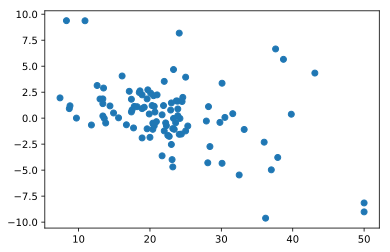

In [75]:
grba = GradientBoostingRegressor(n_estimators=120, learning_rate=.08, max_depth=5, random_state=0, loss='ls')
y_preda = grba.fit(medv_t_sets[MEDV2][X_TRAIN], medv_t_sets[MEDV2][Y_TRAIN]).predict(medv_t_sets[MEDV2][X_TEST])
resa = Result(y_pred, medv_t_sets[MEDV2][Y_TEST].values, 2)
resa.display_totals()

plt.plot(medv_t_sets[MEDV2][Y_TEST].values, resa.list_variances, 'o')
grba

#### This is a list of GBR's with the values on their parameters and their mean Absolute errors. The above result is good but it is supposed to have an MAE of 1.9209. I am not sure what is going on after I changed those cells to markdown. 

#### This is more about the process. Now I can look at hte above information and decide where to go next. The tree depth of 5 makes sense that you are at or a little under the number of columns that had fairly strong correlation. The number of estimators is meant to prevent overfitting and the learning rate while I understand the description I don't know why .08 and .05 would be really different. 

#### I am working on it. 

#### I just know the above graph doesn't strongly slope down to the right. 

DS: MEDV2, estimators: 90 Learn Rate: 0.05 Max Depth: 5
MAE:   1.9590919701360847

DS: MEDV2, estimators: 90 Learn Rate: 0.09 Max Depth: 5
MAE:   1.9421920637030041

DS: MEDV2, estimators: 90 Learn Rate: 0.09 Max Depth: 5
MAE:   1.9367061412887252

DS: MEDV2, estimators: 90 Learn Rate: 0.08 Max Depth: 5
MAE:   1.932796809954867

DS: MEDV2, estimators: 90 Learn Rate: 0.09 Max Depth: 5
MAE:   1.9367061412887252

DS: MEDV2, estimators: 90 Learn Rate: 0.05 Max Depth: 5
MAE:   1.9411683823899313

DS: MEDV2, estimators: 90 Learn Rate: 0.07 Max Depth: 5
MAE:   1.9475648009818194

DS: MEDV2, estimators: 90 Learn Rate: 0.08 Max Depth: 5
MAE:   1.93201982842

DS: MEDV2, estimators: 100 Learn Rate: 0.08 Max Depth: 5
MAE:   1.93201982842

DS: MEDV2, estimators: 100 Learn Rate: 0.09 Max Depth: 5
MAE:   1.9271150557838124

DS: MEDV2, estimators: 130 Learn Rate: 0.08 Max Depth: 5
MAE:   1.9268734655933273

DS: MEDV2, estimators: 200 Learn Rate: 0.08 Max Depth: 4
MAE:   1.9249980025222009

DS: MEDV2, estimators: 180 Learn Rate: 0.08 Max Depth: 4
MAE:   1.9244324818660374

DS: MEDV2, estimators: 120 Learn Rate: 0.08 Max Depth: 5
MAE:   1.9209758133638661


## The NOX column has a mean of .55 and a standard deviation of .11. Rather than just run a histogram or some other method I am just going to infer that if you guess:

### .55 with a .11 range and be right 66% of the time. 

In [63]:
nox1_pred = lin.fit(nox_t_sets[0][X_TRAIN], nox_t_sets[NOX][Y_TRAIN]).predict(nox_t_sets[0][X_TEST])


In [64]:
res_nox1_lin = Result(nox1_pred, nox_t_sets[NOX][Y_TEST].values, .011)
# res_nox2_lin = Result(nox2_pred, nox1_y_test.values, 1)


In [65]:
res_nox1_lin.display_totals()

Range: 0.011
Correct: 18
Mean Variance: 0.042551283529728076


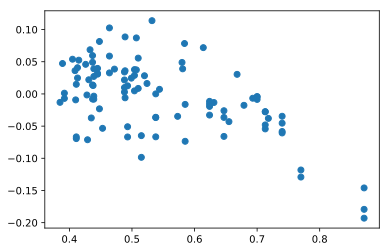

In [66]:
plt.plot(nox_t_sets[NOX][Y_TEST], res_nox1_lin.list_variances, 'o')

In [67]:
res_nox1_lin.get_confidence_interval(66)

0.04889386876208801

## This Model actually outperforms smartest dumbby a lot.

## Gradient Boosting

In [68]:
grb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0, loss='ls')
grb.fit(nox_t_sets[NOX][X_TRAIN], nox_t_sets[NOX][Y_TRAIN])

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=1, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=0,
             subsample=1.0, verbose=0, warm_start=False)

In [69]:
y_pred = grb.fit(nox_t_sets[NOX][X_TRAIN], nox_t_sets[NOX][Y_TRAIN]).predict(nox_t_sets[NOX][X_TEST])
grb_res= Result(y_pred, nox_t_sets[NOX][Y_TEST].values, .1)

In [70]:
grb_res.display_totals()

Range: 0.1
Correct: 97
Mean Variance: 0.03279461260206405


In [71]:
grb_res.get_confidence_interval(66)

0.03641512012432224

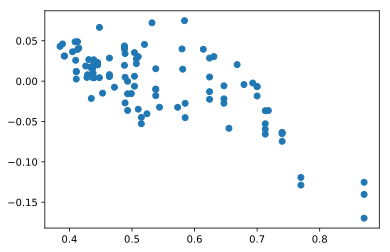

In [72]:
plt.plot(nox_t_sets[NOX][Y_TEST].values, grb_res.list_variances, 'o')


#### I have just started working on this dataset. But there is only so much time. 


#### The first observations are that when predicting NOX both the linear and the GBR predict low on the high NOX samples but are generally good otherwise. 

#### My goal moving forward would be to find something that sets the high NOX samples apart. I know some will say Duh!

#### The above result accomplishes a lot of improvement. It takes the variance you need to claim 66% confidence from .11 to .036